# Plots for paper

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [5]:
def get_evidence(path):


    # Opening JSON file
    f = open(path)

    # returns JSON object as 
    # a dictionary
    data = json.load(f)


    return data["log_evidence"]





def bayes_ratio()



In [8]:
path = "../data/nested_sampling/Bayes_1237_earth_result.json"
top = get_evidence(path)

In [9]:
path = "../data/nested_sampling/Bayes_1237_null_result.json"
bottom = get_evidence(path)

In [10]:
top - bottom

1873441.1032467675

In [4]:
import json 
import pandas as pd 



def surface_numbers(path):
    # Opening JSON file
    f = open(path)

    # returns JSON object as 
    # a dictionary
    data = json.load(f)

    #Make it a dataframe. Nice for surfacing
    df = pd.DataFrame(data["samples"]["content"]) # posterior


    #Make it a dataframe. Nice for surfacing
    df_posterior = pd.DataFrame(data["posterior"]["content"]) # posterior
    df_samples = pd.DataFrame(data["samples"]["content"]) # posterior


    variances = df_posterior.var()
    medians = df_posterior.median()

    print(path)
    print("Medians")
    print(medians.head(7))
    print("Variances")
    print(variances.head(7))

    print("********************************************")

In [4]:
from plotting import plot_custom_corner

In [5]:
def plot_all_corners(path,seed):


    #default values of GW parameters
    ranges=[(4e-7,6e-7),(-np.pi,np.pi),(0.0+1.0,np.pi+1.0),(0.0,np.pi/2.0),(-np.pi/2 + 0.8,np.pi/2 + 0.8),(0.0,np.pi),(0.5e-12,1.5e-12)]
    injection_parameters = [5e-7,0.20,2.50,1.0,1.0,1.0,1e-12]
    labels = [r'$\omega$',r'$\Phi_0$',r'$\psi$',r'$\iota$', r'$\delta$',r'$\alpha$',r'h']
    variables_to_plot = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw", "h"]
    axes_scales = None

    #Corner plot of GW parameters
    plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=None)




    #Plot f0 
    pulsars = pd.read_csv("../data/NANOGrav_pulsars.csv")
    true_f = pulsars["F0"].to_numpy()


    labels = [r'$f_0$',r'$f_1$',r'$f_2$',r'$f_3$', r'$f_4$']
    idx = len(labels)
    injection_parameters = true_f[0:idx]
    variables_to_plot = ["f00", "f01", "f02", "f03", "f04"]

    ranges = [(i*0.9,i*1.1) for i in injection_parameters]
    axes_scales = None
    plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=None )


    #Plot f1
    true_f = pulsars["F1"].to_numpy()

    labels = [r'$\dot{f}_0$',r'$\dot{f}_1$',r'$\dot{f}_2$',r'$\dot{f}_3$', r'$\dot{f}_4$']
    idx = len(labels)
    injection_parameters = true_f[0:idx]
    variables_to_plot = ["fdot0", "fdot1", "fdot2", "fdot3", "fdot4"]

    tol = 0.1
    ranges = [(i-np.abs(i*tol),i+np.abs(i*tol)) for i in injection_parameters]
    axes_scales = None
    plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=None)




    #Plot sigma_p



    #seed = 1235
    generator = np.random.default_rng(seed)
    σp = generator.uniform(low = 1e-21,high=1e-19,size=len(true_f))

        
    labels = [r'$\sigma_p^0$',r'$\sigma_p^1$',r'$\sigma_p^2$',r'$\sigma_p^3$', r'$\sigma_p^4$']
    idx = len(labels)
    injection_parameters = σp[0:idx]
    variables_to_plot    = ["sigma_p0", "sigma_p1", "sigma_p2", "sigma_p3", "sigma_p4"]

    tol = 0.1
    ranges = [(i-np.abs(i*tol),i+np.abs(i*tol)) for i in injection_parameters]
    axes_scales = None
    plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=None)






## Batch 1237

The evidence is: -538677.3000651377
Number of samples:
9836
Truths/Medians/Variances
5e-07 omega_gw 4.999956713530613e-07 2.1998240894556208e-23
0.2 phi0_gw 0.1933770419688168 6.547371419198121e-07
2.5 psi_gw 2.5962559662085445 3.1776818366396837e-07
1.0 iota_gw 0.9767055650418923 0.007593820028455818
1.0 delta_gw 1.0017163115419332 3.8236059922500053e-07
1.0 alpha_gw 1.039557439694603 1.936508645152293e-07
1e-12 h 1.239221317579755e-12 5.460433003546534e-27
selected variabels are
['omega_gw', 'phi0_gw', 'psi_gw', 'iota_gw', 'delta_gw', 'alpha_gw', 'h']


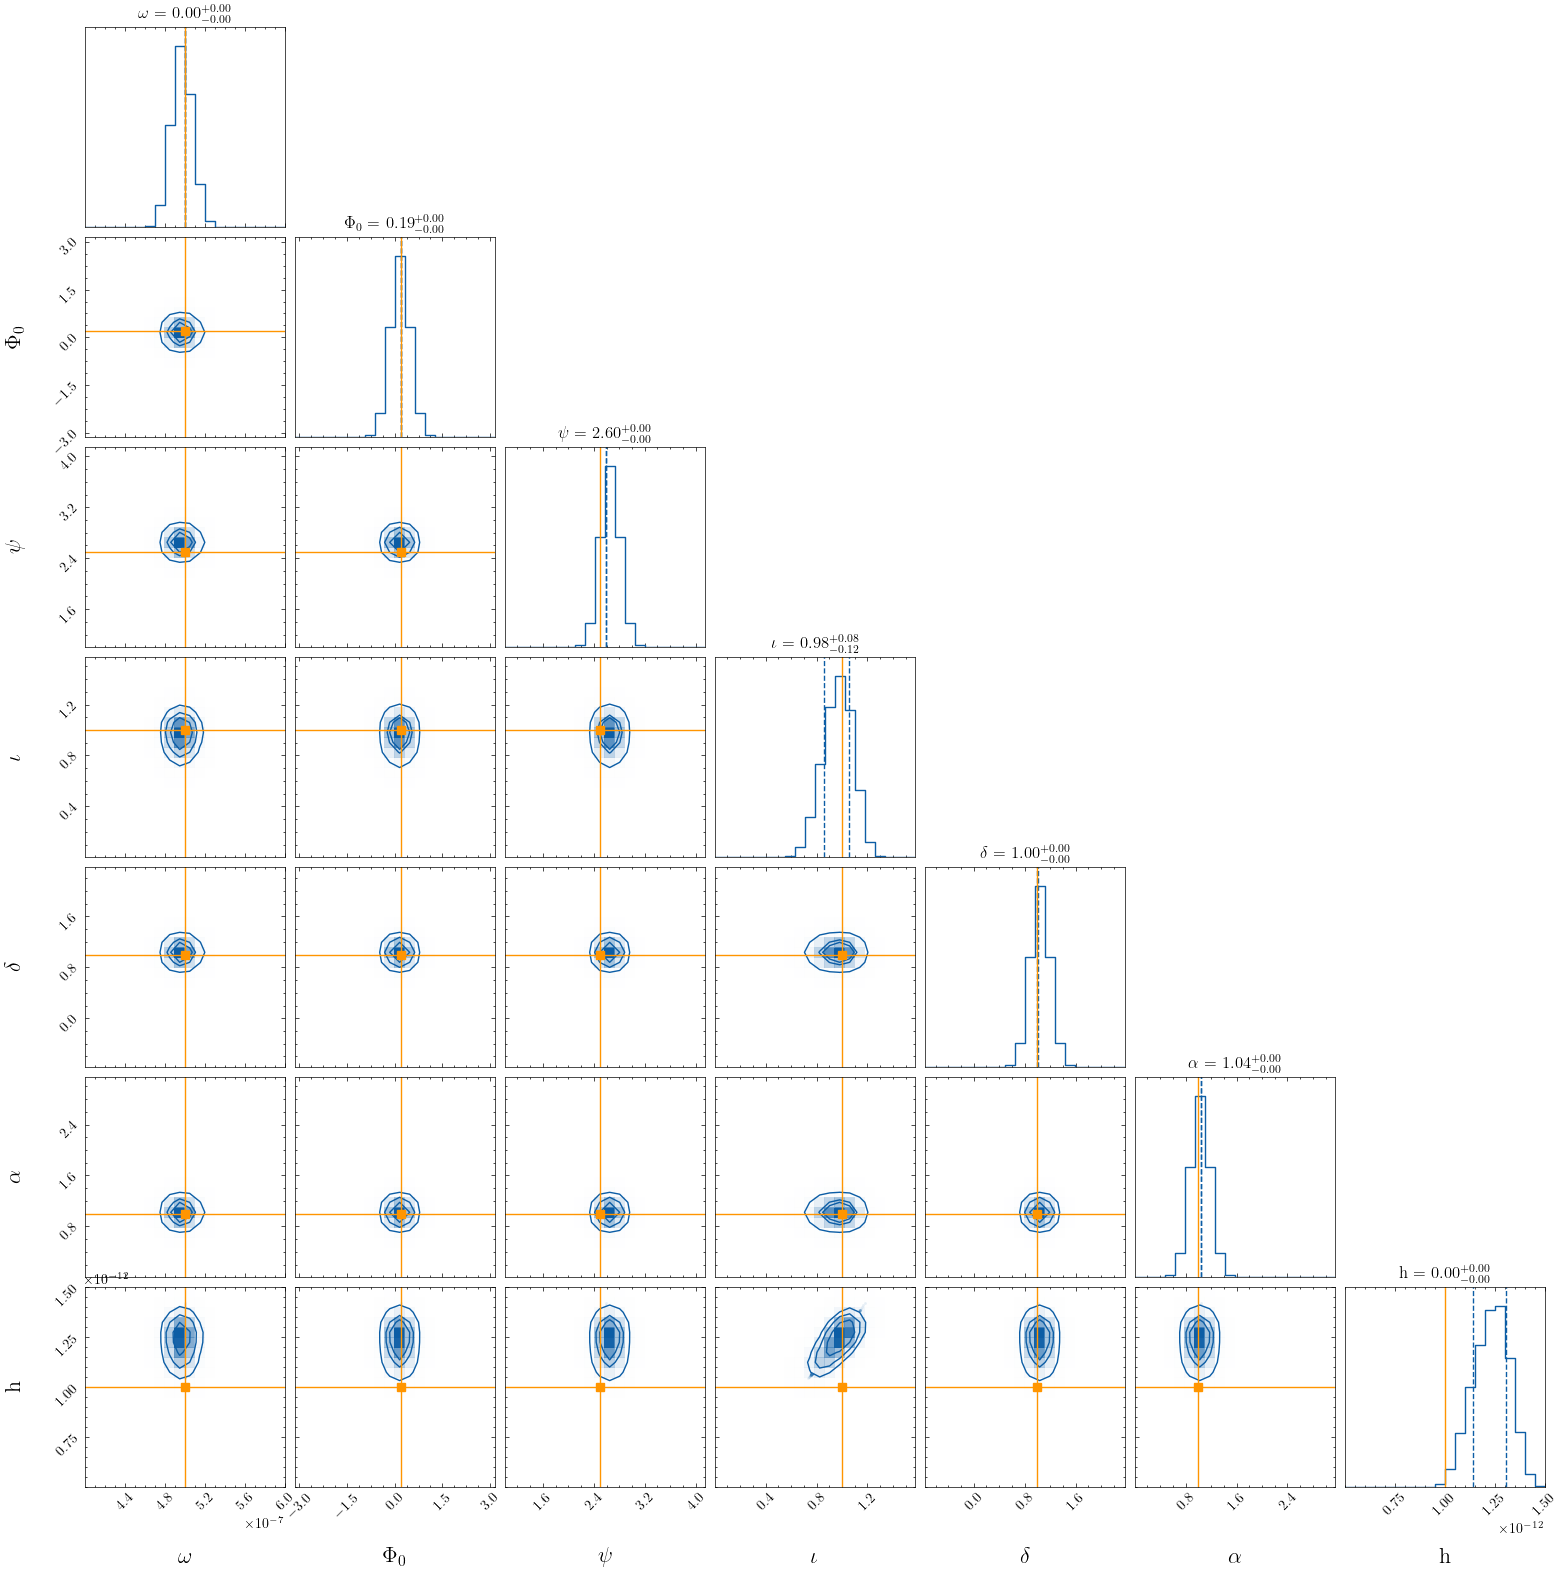

The evidence is: -538677.3000651377
Number of samples:
9836
Truths/Medians/Variances
327.8470205611185 f00 329.4254443199831 0.22260675980011554
205.53069910059 f01 207.02944853402727 0.0984984565426536
303.0909794113198 f02 302.9423808071124 2.023289508974191
326.600561967271 f03 329.2935000209259 0.110795739842539
348.5592316999902 f04 348.3448760713368 2.452717405984241
selected variabels are
['f00', 'f01', 'f02', 'f03', 'f04']


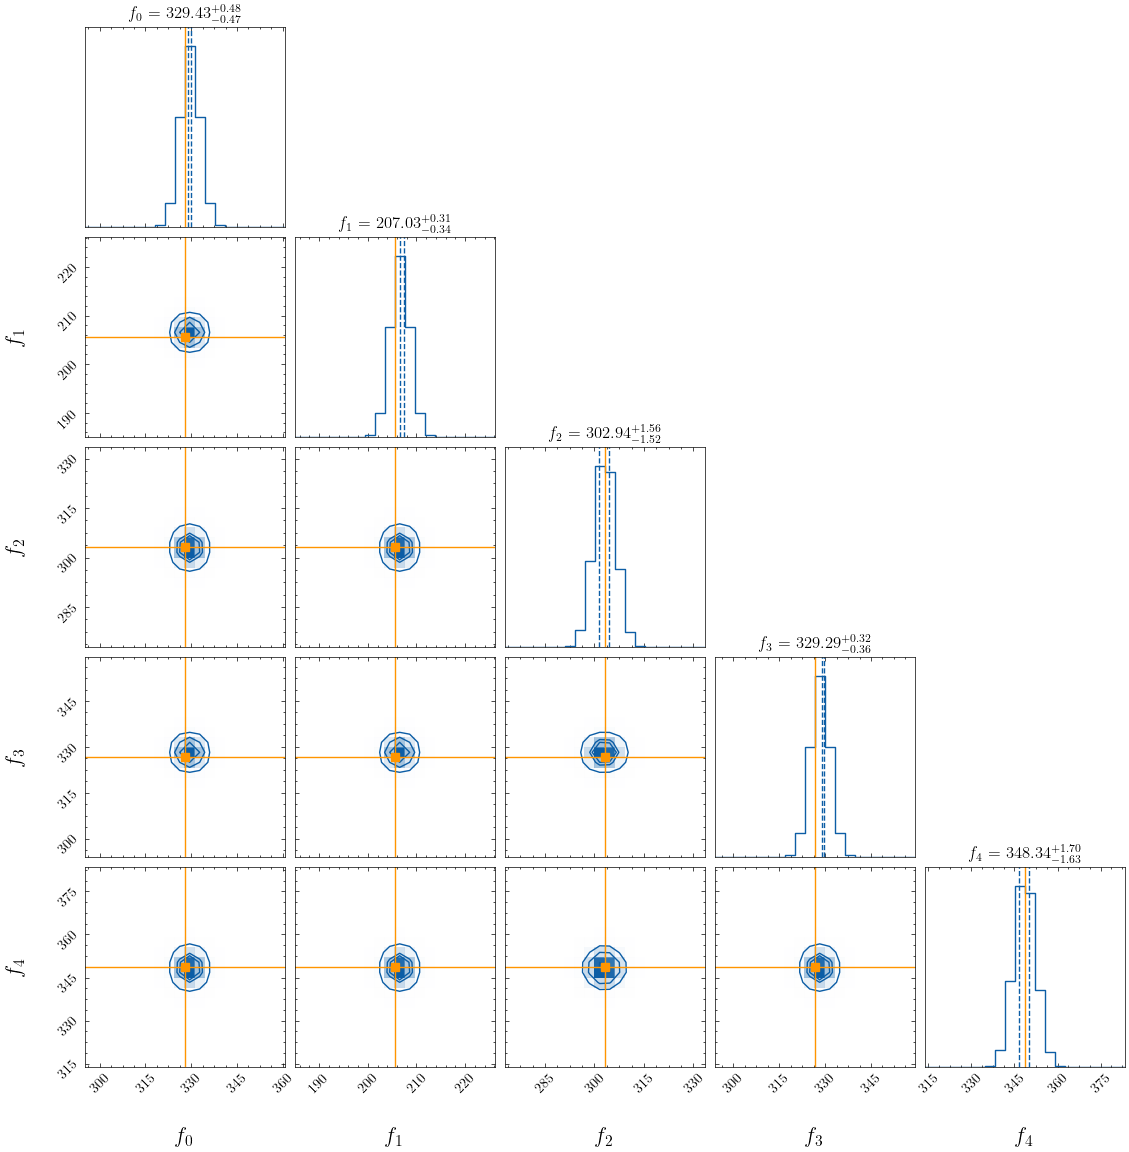

The evidence is: -538677.3000651377
Number of samples:
9836
Truths/Medians/Variances
-1.227834e-15 fdot0 -1.225212040456997e-15 2.78491075732231e-35
-4.297e-16 fdot1 -4.30880159712904e-16 2.1040035366880772e-36
-6.4737e-16 fdot2 -6.493305541179381e-16 7.65592811968548e-36
-1.022991e-15 fdot3 -1.0218319925150396e-15 2.0190923465198828e-35
-4.1895e-16 fdot4 -4.188181375987945e-16 3.160973008413512e-36
selected variabels are
['fdot0', 'fdot1', 'fdot2', 'fdot3', 'fdot4']


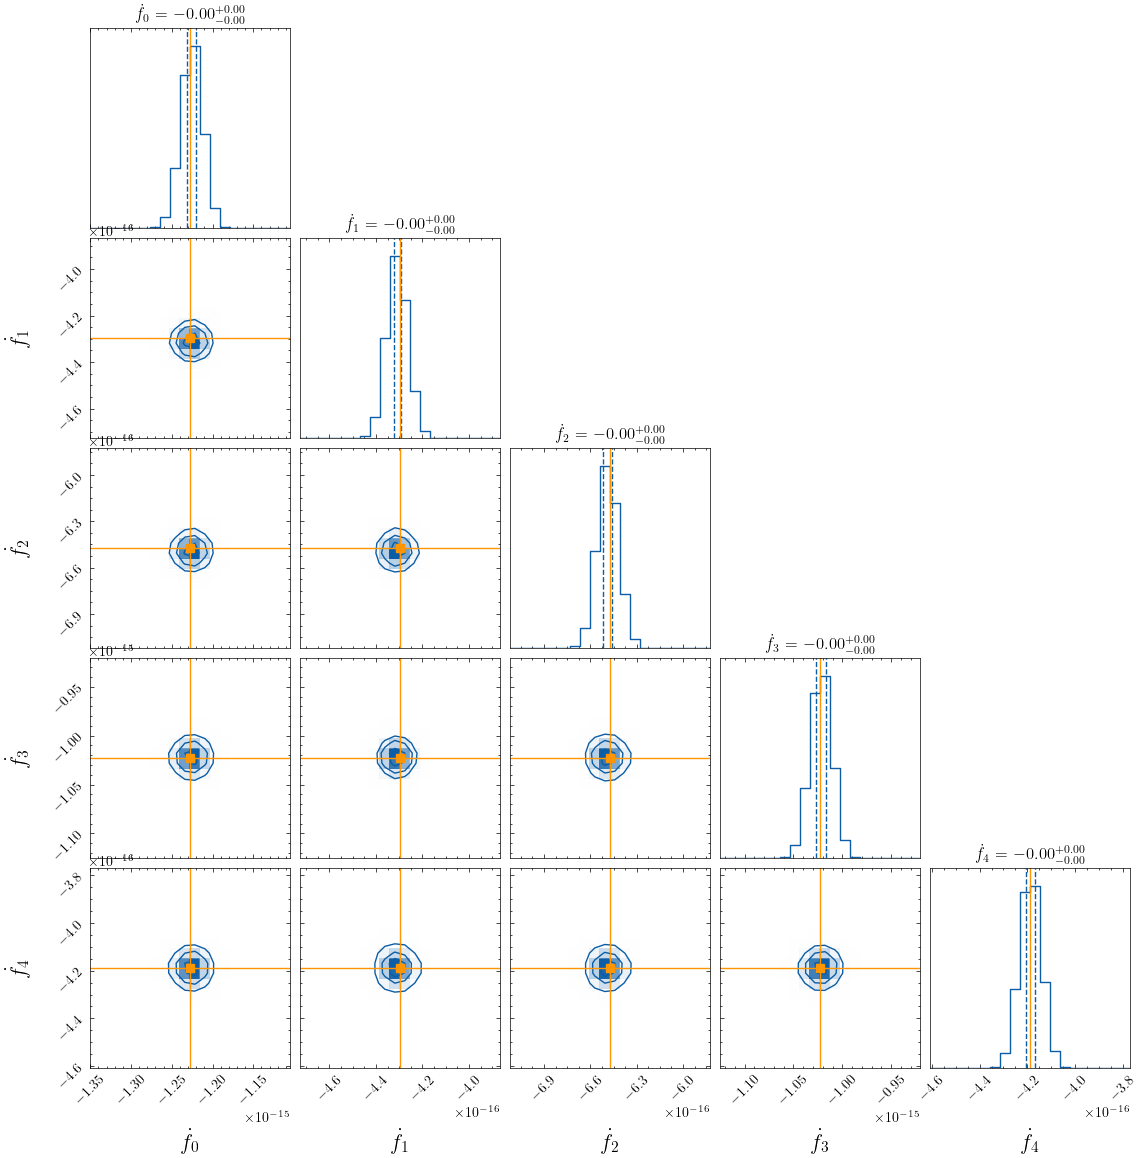

The evidence is: -538677.3000651377
Number of samples:
9836
Truths/Medians/Variances
5.054028399366765e-20 sigma_p0 5.0425946926732e-20 4.711812090409937e-44
6.644933202006474e-20 sigma_p1 6.605586724196175e-20 3.711563846638958e-44
2.4231055016152945e-20 sigma_p2 2.426276146687015e-20 1.0095656824885672e-44
5.255055881680675e-21 sigma_p3 5.273703451132293e-21 4.640188756596229e-46
4.059888409075103e-20 sigma_p4 4.044646081940878e-20 2.78816439416726e-44
selected variabels are
['sigma_p0', 'sigma_p1', 'sigma_p2', 'sigma_p3', 'sigma_p4']


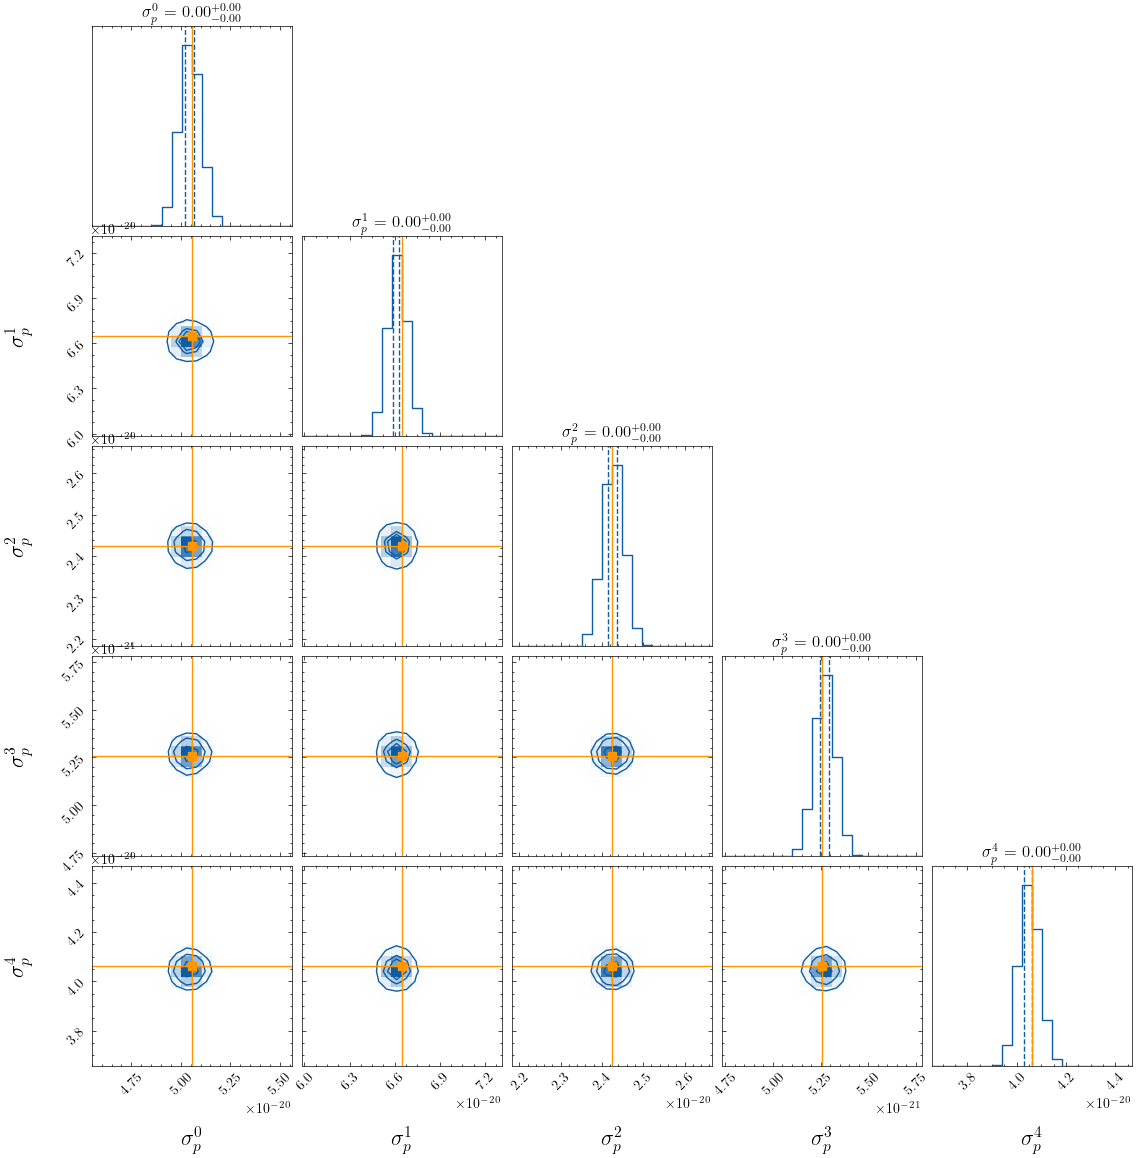

In [7]:
import numpy as np 
path = "../data/nested_sampling/batch_1237_result.json"
plot_all_corners(path,1237)

## Batch 1238

The evidence is: -541876.2120628876
Number of samples:
7784
Truths/Medians/Variances
5e-07 omega_gw 4.999964403495194e-07 2.1278803661069934e-23
0.2 phi0_gw 0.193266788449492 6.192584074948007e-07
2.5 psi_gw 2.594840647845988 4.275682827548367e-07
1.0 iota_gw 0.6187541290001598 0.0012703752552030417
1.0 delta_gw 1.0001129520727199 3.2106477556363844e-07
1.0 alpha_gw 1.0388794944943296 2.081814571394384e-07
1e-12 h 9.771313577116755e-13 3.83145442522507e-28
selected variabels are
['omega_gw', 'phi0_gw', 'psi_gw', 'iota_gw', 'delta_gw', 'alpha_gw', 'h']


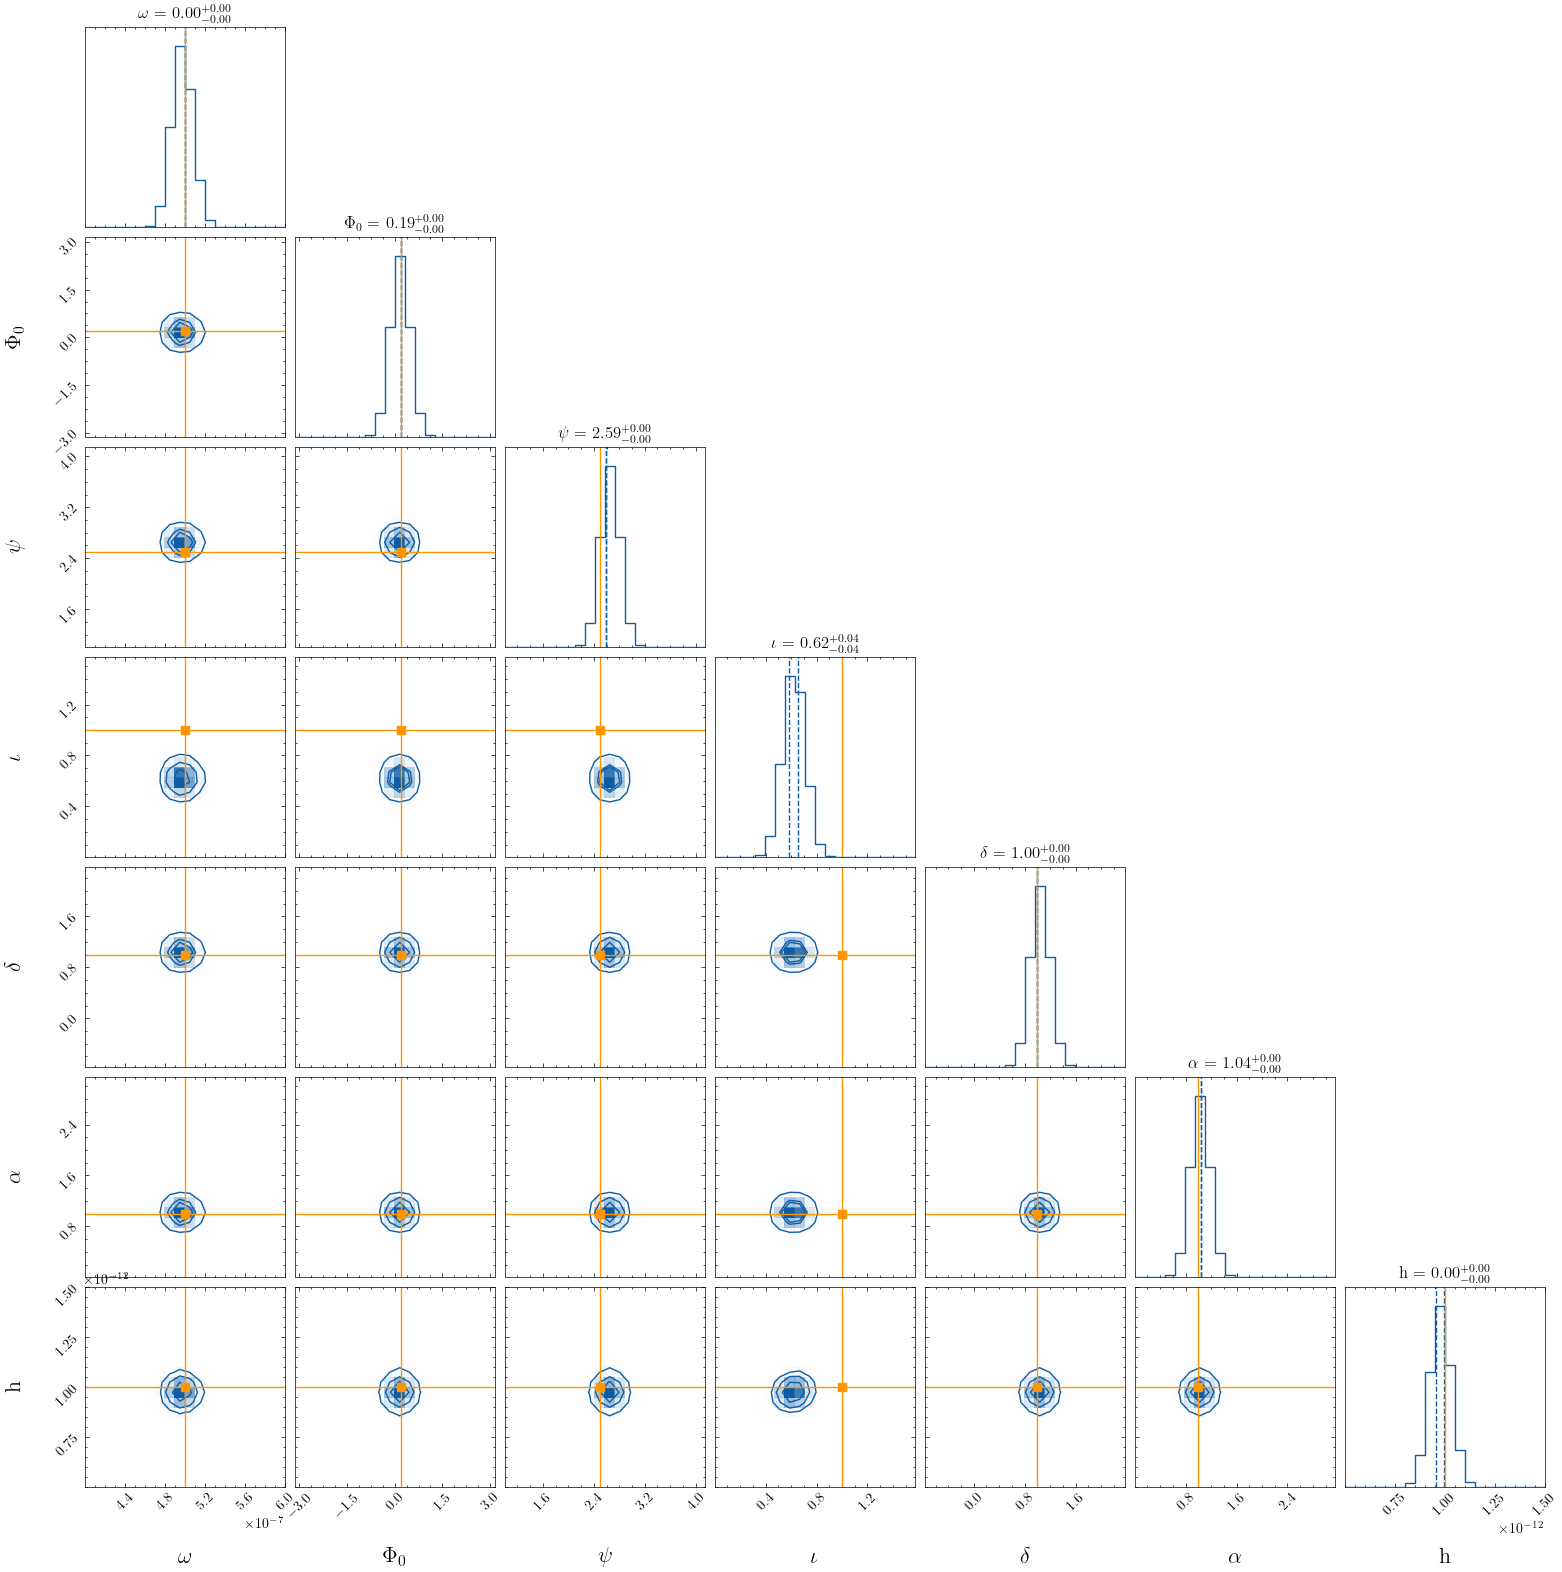

The evidence is: -541876.2120628876
Number of samples:
7784
Truths/Medians/Variances
327.8470205611185 f00 330.71803021697804 0.07702801120380111
205.53069910059 f01 206.76313455511473 0.14447508800180003
303.0909794113198 f02 303.8735676891173 1.4691327589051075
326.600561967271 f03 329.60487448078595 0.03655854233540252
348.5592316999902 f04 348.0314363774585 1.9458307795808742
selected variabels are
['f00', 'f01', 'f02', 'f03', 'f04']


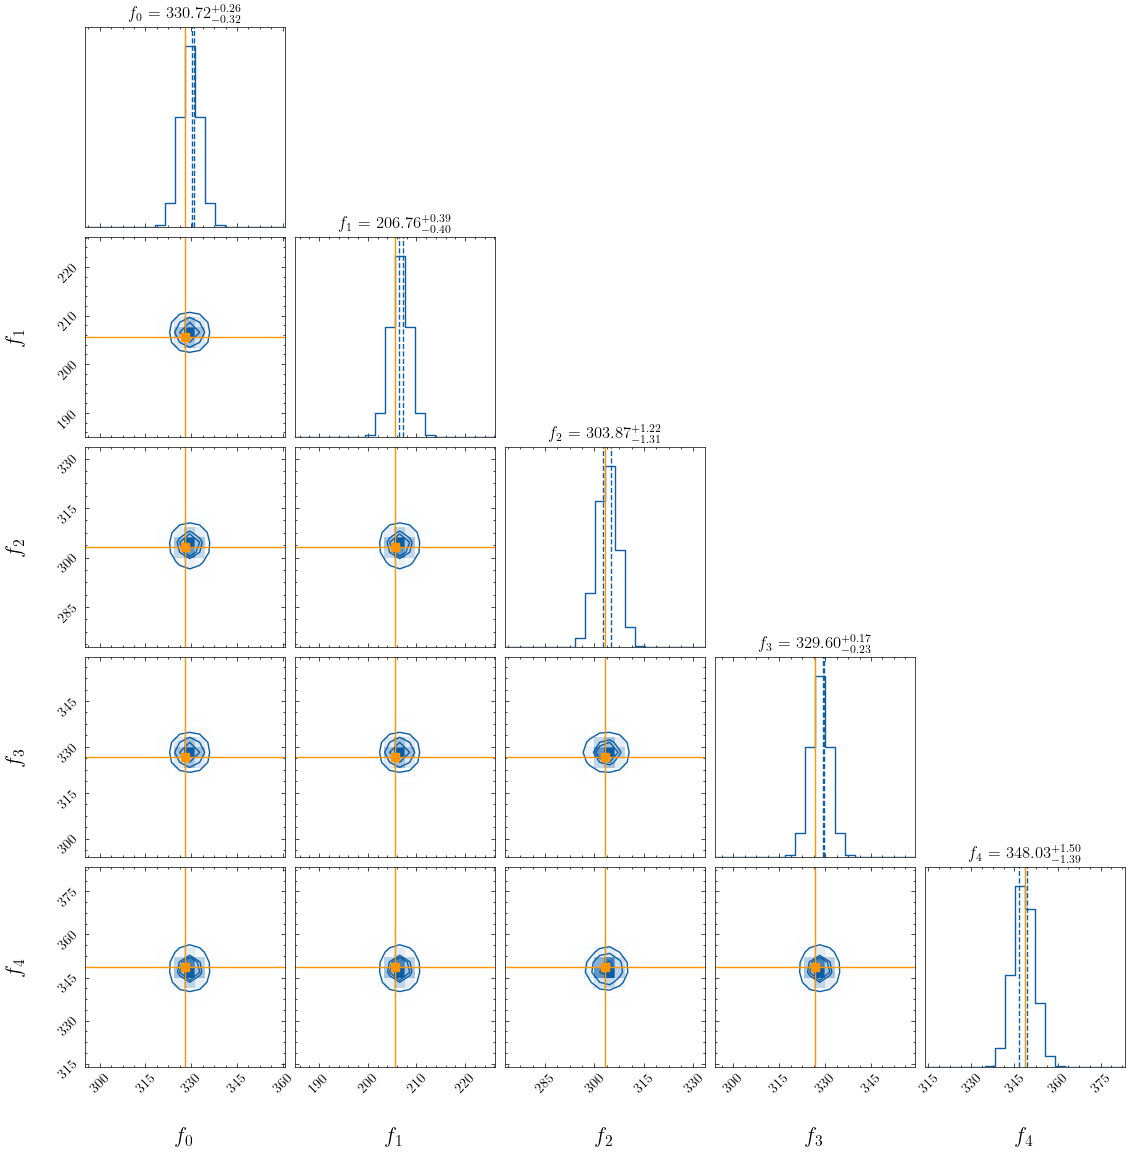

The evidence is: -541876.2120628876
Number of samples:
7784
Truths/Medians/Variances
-1.227834e-15 fdot0 -1.2265981102695735e-15 3.027735574344108e-35
-4.297e-16 fdot1 -4.313069098886625e-16 2.752211080866794e-36
-6.4737e-16 fdot2 -6.472098417494129e-16 7.773163931509935e-36
-1.022991e-15 fdot3 -1.0230580961528808e-15 1.735784339043879e-35
-4.1895e-16 fdot4 -4.201981277929947e-16 3.23858598711049e-36
selected variabels are
['fdot0', 'fdot1', 'fdot2', 'fdot3', 'fdot4']


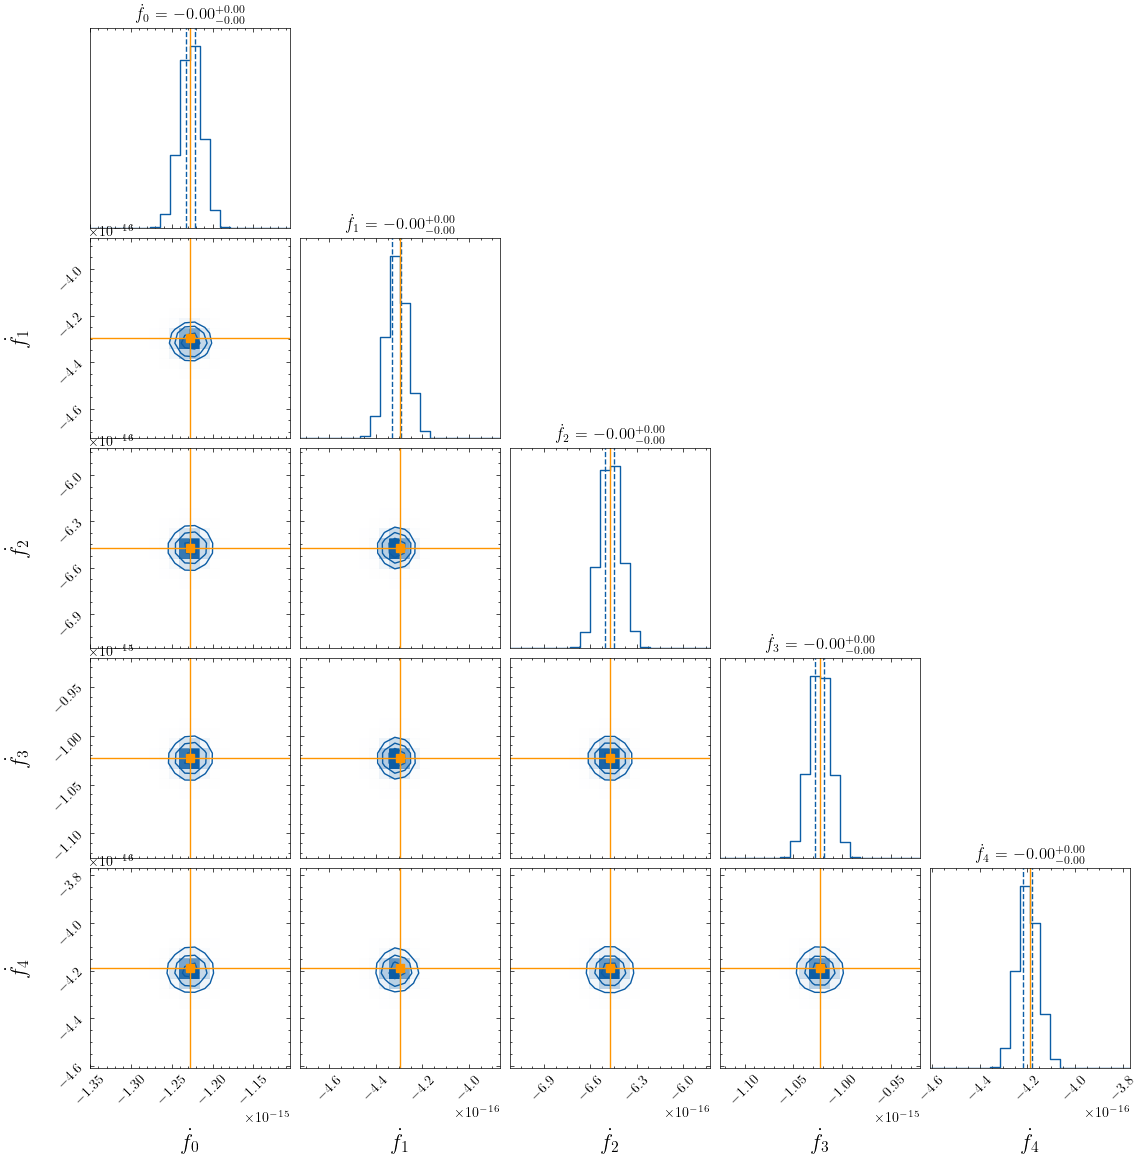

The evidence is: -541876.2120628876
Number of samples:
7784
Truths/Medians/Variances
9.342685814760023e-20 sigma_p0 9.329920493191232e-20 1.7270959866422223e-43
3.1736105118188206e-21 sigma_p1 3.1765265105032564e-21 1.9885998814622778e-46
7.781407195300787e-20 sigma_p2 7.837090954386213e-20 2.7459962050927734e-44
5.732462578693075e-20 sigma_p3 5.72149247749294e-20 5.838876051771687e-44
2.2804718246541516e-20 sigma_p4 2.2950866704542792e-20 3.459161973798888e-45
selected variabels are
['sigma_p0', 'sigma_p1', 'sigma_p2', 'sigma_p3', 'sigma_p4']


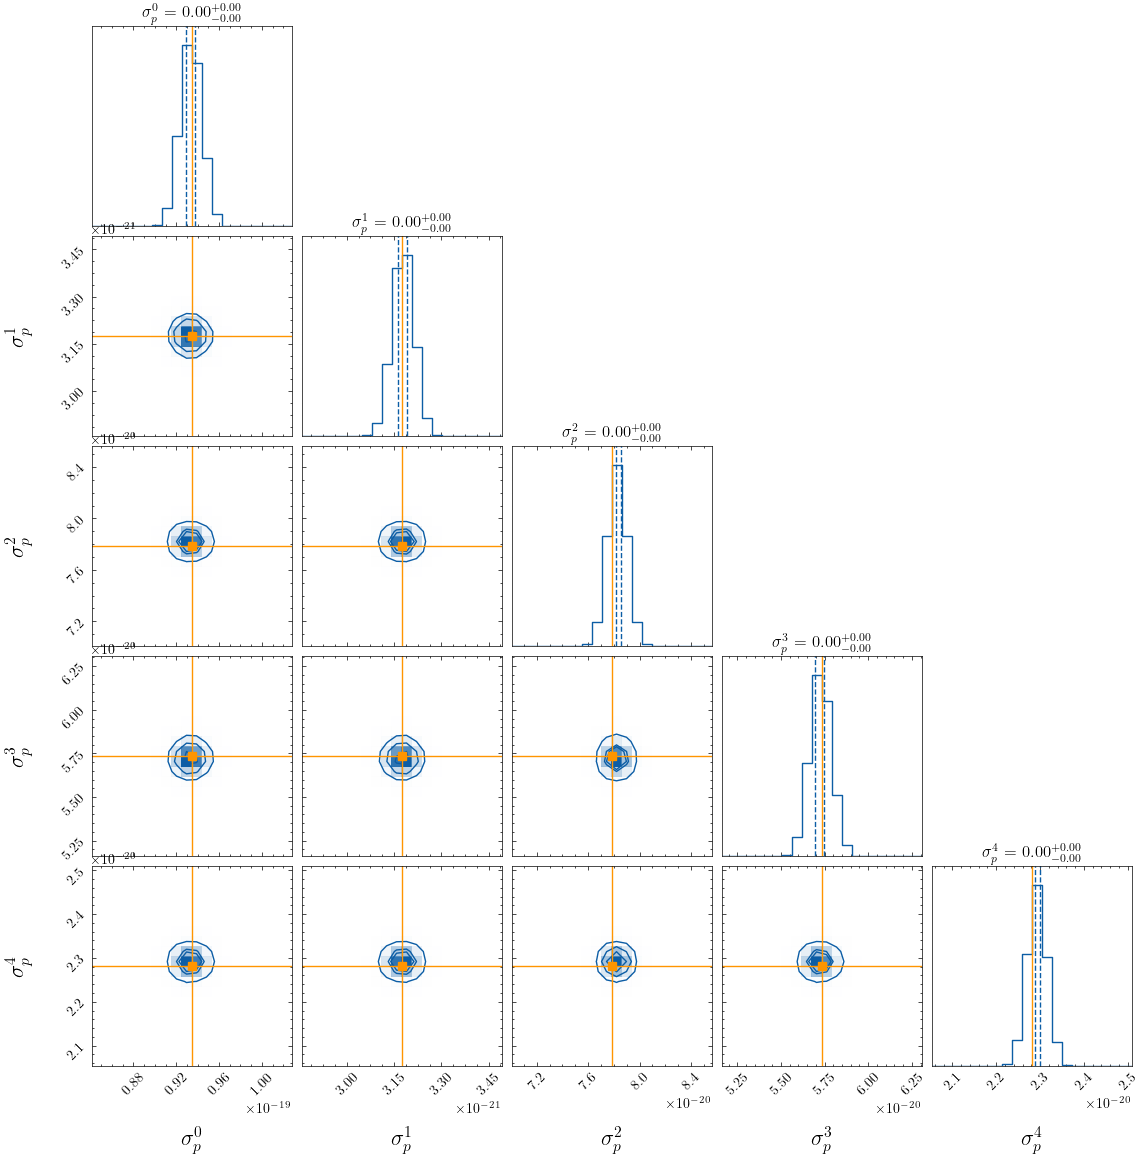

In [8]:
import numpy as np 
path = "../data/nested_sampling/batch_1238_result.json"
plot_all_corners(path,1238)

## 1239

The evidence is: -540268.5148719716
Number of samples:
16111
Truths/Medians/Variances
5e-07 omega_gw 5.000211146931636e-07 2.8215734224541765e-23
0.2 phi0_gw 0.1989923942935455 9.962767494951627e-07
2.5 psi_gw 2.59662760989328 3.4856388392317475e-07
1.0 iota_gw 0.9032230225924616 0.007848910654756135
1.0 delta_gw 1.003885833099662 2.4329384652702086e-07
1.0 alpha_gw 1.0408506149904335 1.94872728167283e-07
1e-12 h 1.1762653728468516e-12 5.428529830003753e-27
selected variabels are
['omega_gw', 'phi0_gw', 'psi_gw', 'iota_gw', 'delta_gw', 'alpha_gw', 'h']


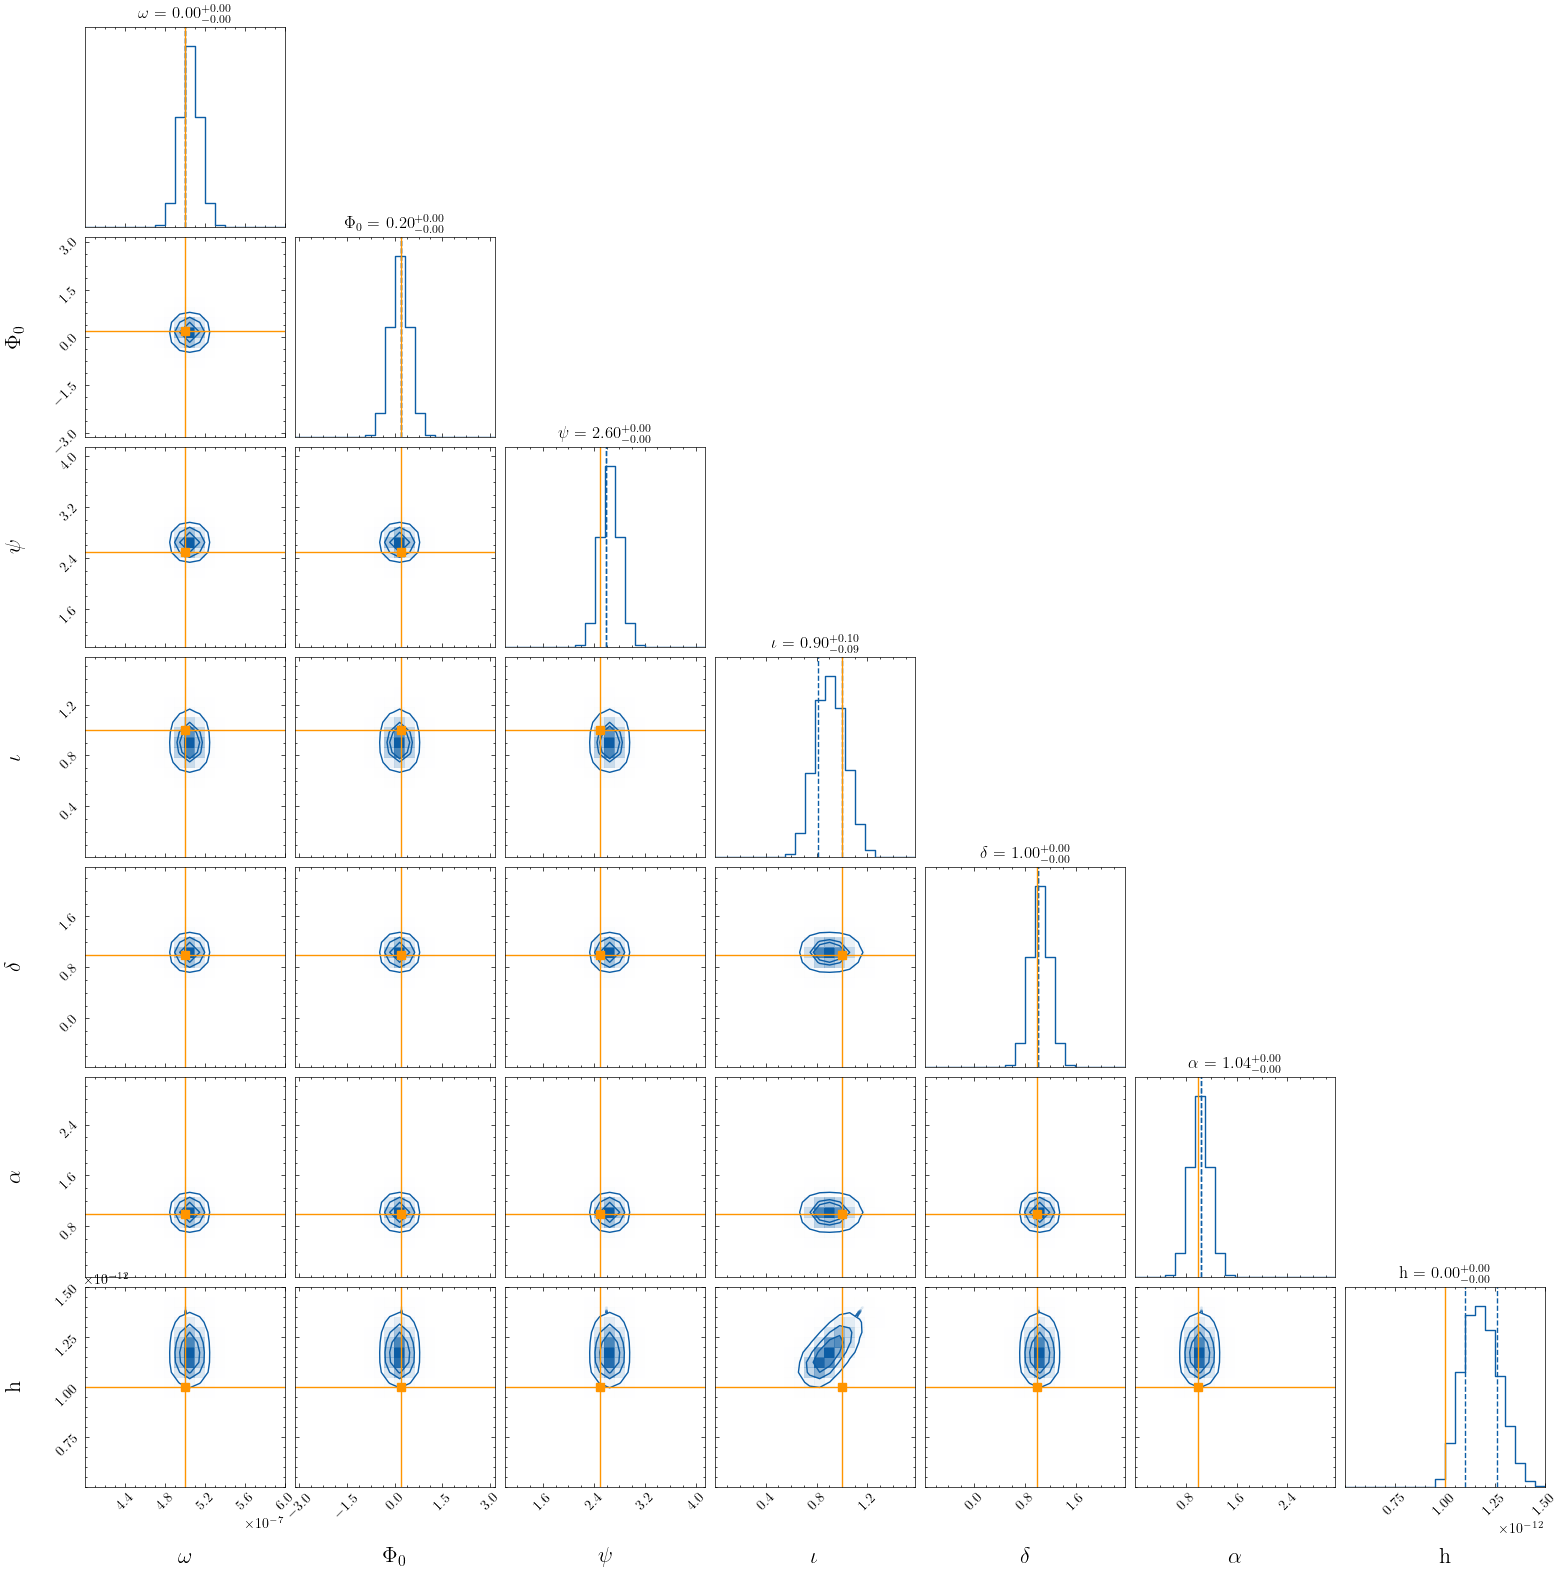

The evidence is: -540268.5148719716
Number of samples:
16111
Truths/Medians/Variances
327.8470205611185 f00 330.4665162047896 0.13732165225163165
205.53069910059 f01 206.38942804544973 0.14190010193126
303.0909794113198 f02 303.9888428726162 1.589266629816003
326.600561967271 f03 329.29452880626036 0.10545521866109957
348.5592316999902 f04 348.1395537831404 1.7359310689957974
selected variabels are
['f00', 'f01', 'f02', 'f03', 'f04']


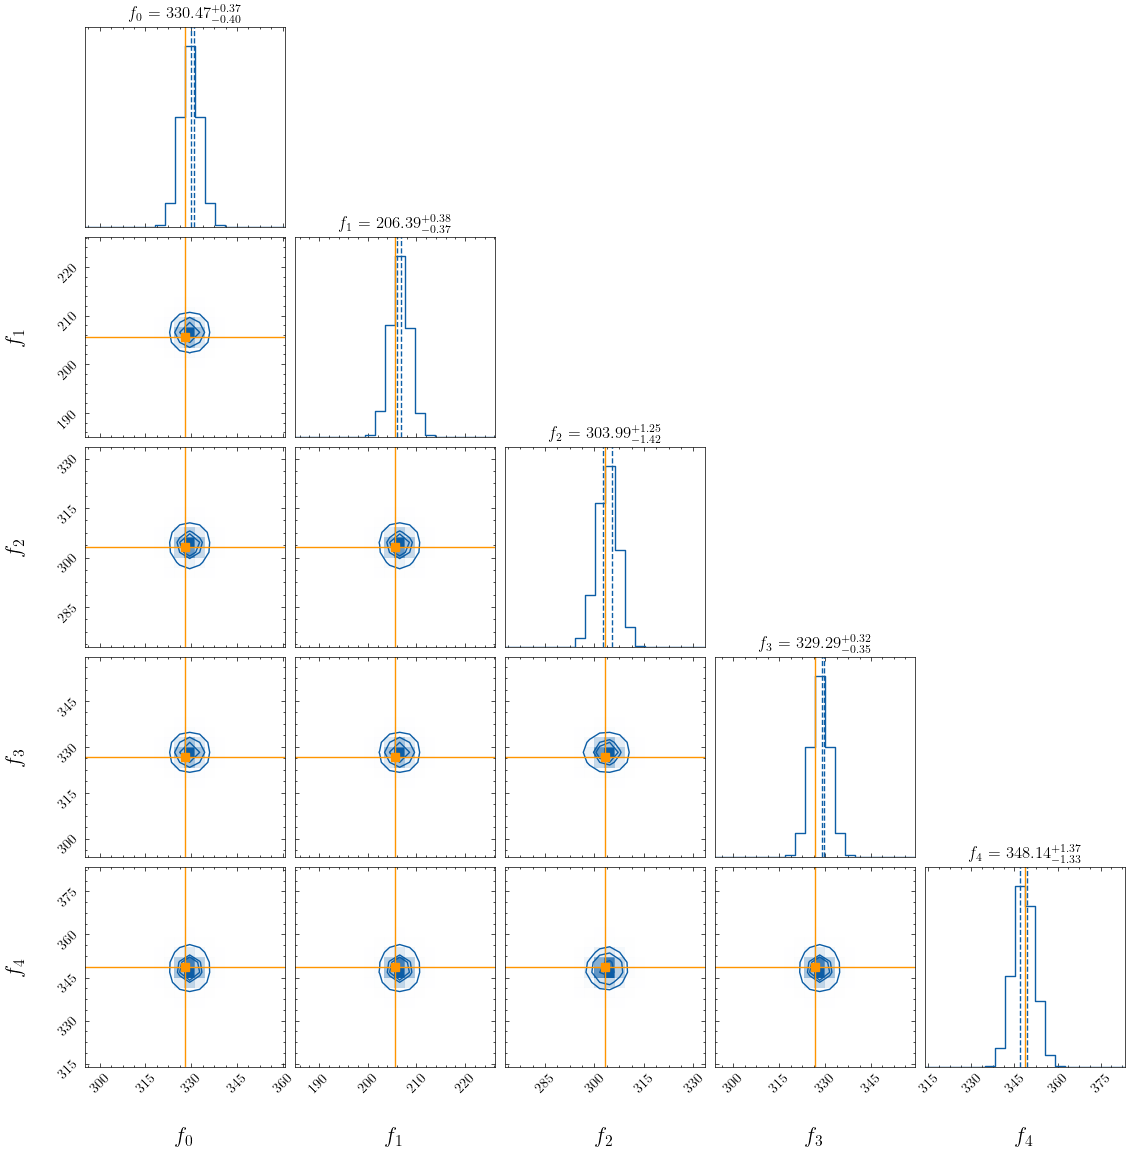

The evidence is: -540268.5148719716
Number of samples:
16111
Truths/Medians/Variances
-1.227834e-15 fdot0 -1.2327030774995722e-15 1.7936986538441773e-35
-4.297e-16 fdot1 -4.2945809071927137e-16 2.6024308161716294e-36
-6.4737e-16 fdot2 -6.5055680651290165e-16 5.0066523902730586e-36
-1.022991e-15 fdot3 -1.0199349122085554e-15 1.99638199223465e-35
-4.1895e-16 fdot4 -4.1782455715045447e-16 2.6115954133131507e-36
selected variabels are
['fdot0', 'fdot1', 'fdot2', 'fdot3', 'fdot4']


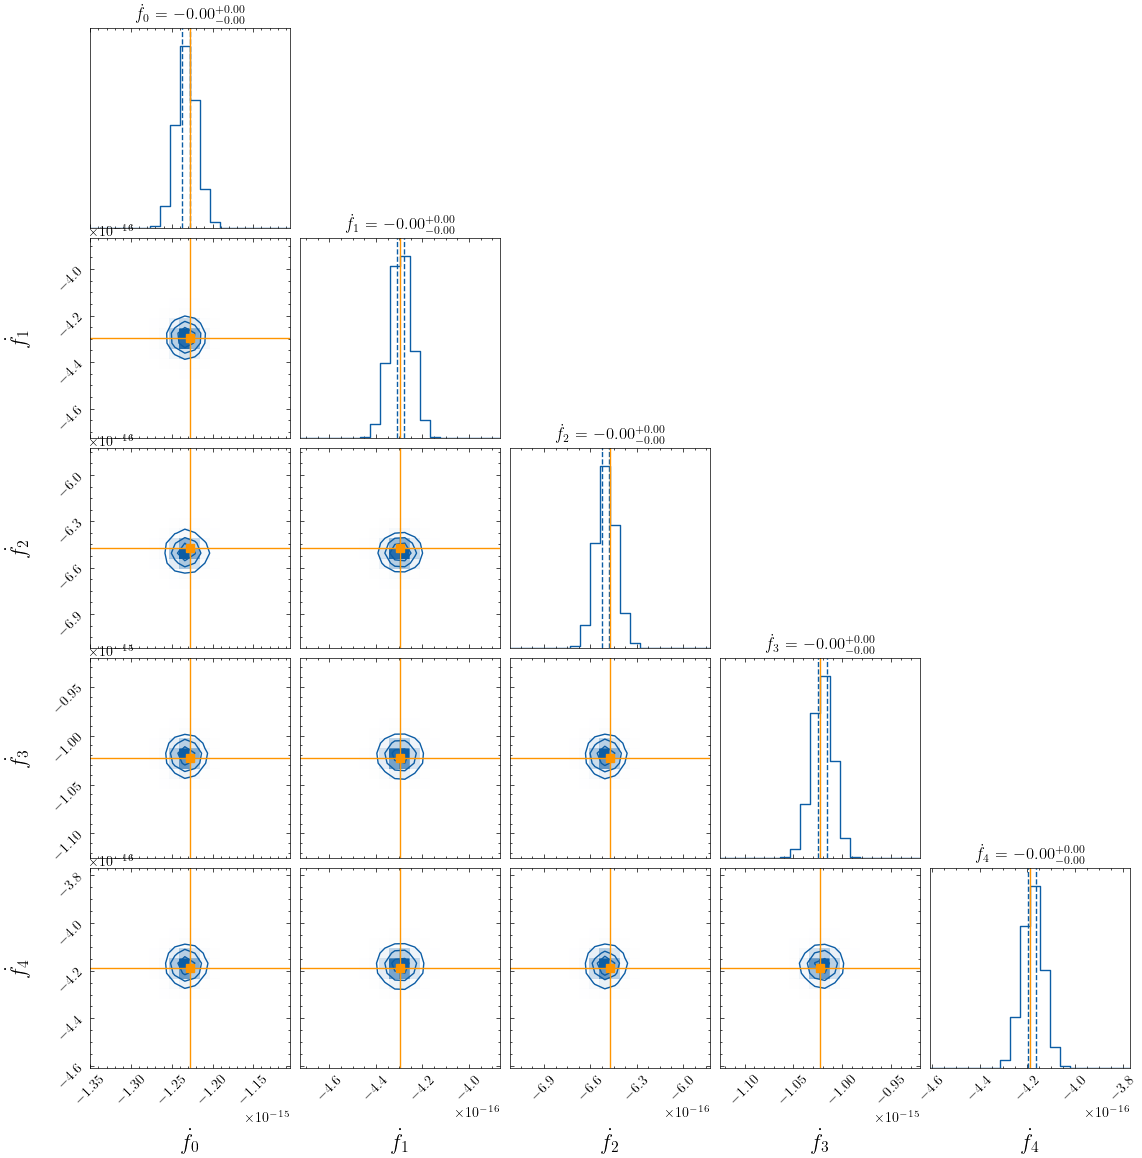

The evidence is: -540268.5148719716
Number of samples:
16111
Truths/Medians/Variances
5.740559328540687e-20 sigma_p0 5.759838407430934e-20 3.750439297446345e-44
6.215219105922394e-20 sigma_p1 6.234873373555582e-20 6.314093011138521e-44
6.871048925374395e-20 sigma_p2 6.891781840058469e-20 7.222935545453075e-44
1.109562554300247e-20 sigma_p3 1.1030763042233594e-20 1.314829485009863e-45
8.869370487865581e-20 sigma_p4 8.848548627849045e-20 1.127574818510894e-43
selected variabels are
['sigma_p0', 'sigma_p1', 'sigma_p2', 'sigma_p3', 'sigma_p4']


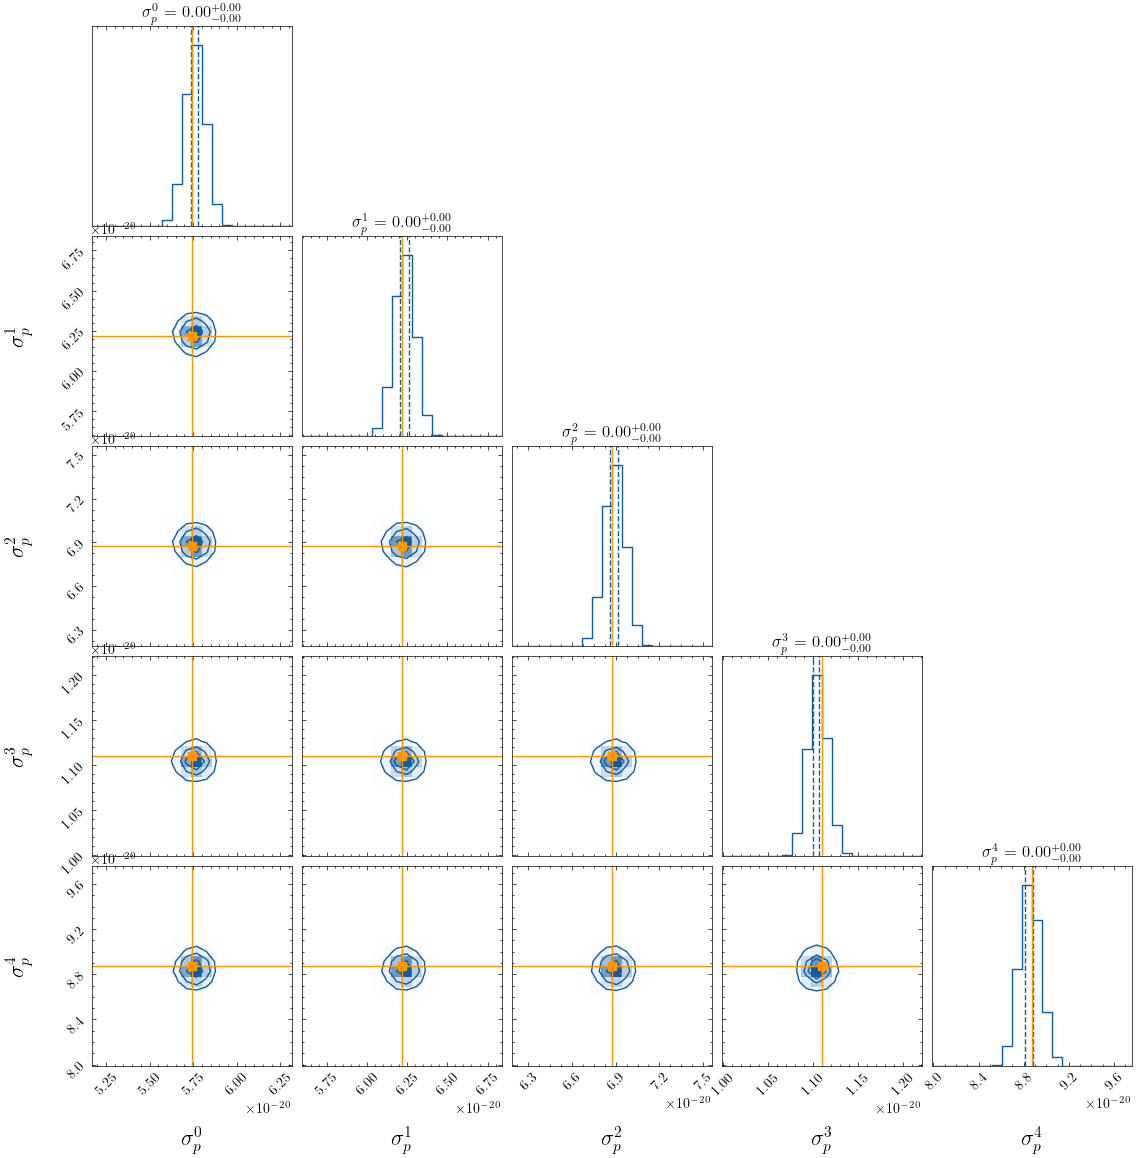

In [10]:
import numpy as np 
path = "../data/nested_sampling/batch_1239_result.json"
plot_all_corners(path,1239)

In [79]:

import matplotlib.pyplot as plt 
from priors import priors_dict
import numpy as np 
import json
import pandas as pd 
import corner
import scienceplots

def load_data(path,variables_to_plot):

    print("Loading data from file:", path)
    # Opening JSON file
    f = open(path)
    
    # returns JSON object as 
    # a dictionary
    data = json.load(f)




    #Make it a dataframe. Nice for surfacing
    df = pd.DataFrame(data["samples"]["content"]) # posterior


    #Make it a dataframe. Nice for surfacing
    df_posterior = pd.DataFrame(data["posterior"]["content"]) # posterior
    df_samples = pd.DataFrame(data["samples"]["content"]) # posterior



    #Now make it a numpy array
    y_samp = df_samples.to_numpy() 


       
    y_post = df_posterior[variables_to_plot].to_numpy()


    print("The evidence is:", data["log_evidence"])
    print("Number of samples:",len(df_posterior))
    print("Truths/Medians/Variances")
    medians = df_posterior[variables_to_plot].median()
    variances = df_posterior[variables_to_plot].var()
    for i in range(len(medians)):
        print(variables_to_plot[i],medians[i],variances[i])
    

    print('---------------------------------------------------')
    return y_post 




def stacked_corner(list_of_files,variables_to_plot,ranges,injection_parameters,labels,axes_scales):


    y = []
    fig= None 
    for f in list_of_files:
        yi = load_data(f,variables_to_plot)
        y.extend([yi])

    plt.style.use('science')



    for i in range(len(y)):

        k = i 
        if k ==2:
            k = k+1 #convoluted way of skipping C2 color
        
        nsamples = len(y[i])
        fig = corner.corner(y[i], 
                            color=f'C{k}',
                            show_titles=True,
                            smooth=True,smooth1d=True,
                            truth_color='C2',
                            quantiles=[0.16, 0.84],
                            truths =injection_parameters ,
                            range=ranges,
                            labels = labels,
                            label_kwargs=dict(fontsize=16),
                            axes_scales = axes_scales,
                            weights = np.ones(nsamples)/nsamples,
                            fig=fig)
        i += 1
            


In [80]:
import glob 
list_of_files = sorted(glob.glob("../data/nested_sampling/batch_*_result.json"))
#list_of_files = list_of_files[0:7] #only plot N results
list_of_files

['../data/nested_sampling/batch_1235_result.json',
 '../data/nested_sampling/batch_1237_result.json',
 '../data/nested_sampling/batch_1238_result.json',
 '../data/nested_sampling/batch_1239_result.json',
 '../data/nested_sampling/batch_1240_result.json',
 '../data/nested_sampling/batch_1241_result.json']

Loading data from file: ../data/nested_sampling/batch_1235_result.json
The evidence is: -542578.9941053521
Number of samples: 11960
Truths/Medians/Variances
omega_gw 4.999657563444715e-07 2.1136995123220232e-23
phi0_gw 0.1887006362438614 5.960897198232487e-07
psi_gw 2.599238048902973 6.223024857414621e-07
iota_gw 0.8879413097696636 0.0023396271514821
delta_gw 1.0024923867997324 5.496160915489854e-07
alpha_gw 1.0436610207730403 3.507780449109531e-07
h 1.1632504245661298e-12 1.6331177918869808e-27
---------------------------------------------------
Loading data from file: ../data/nested_sampling/batch_1237_result.json
The evidence is: -538677.3000651377
Number of samples: 9836
Truths/Medians/Variances
omega_gw 4.999956713530613e-07 2.1998240894556208e-23
phi0_gw 0.1933770419688168 6.547371419198121e-07
psi_gw 2.5962559662085445 3.1776818366396837e-07
iota_gw 0.9767055650418923 0.007593820028455818
delta_gw 1.0017163115419332 3.8236059922500053e-07
alpha_gw 1.039557439694603 1.93650864515

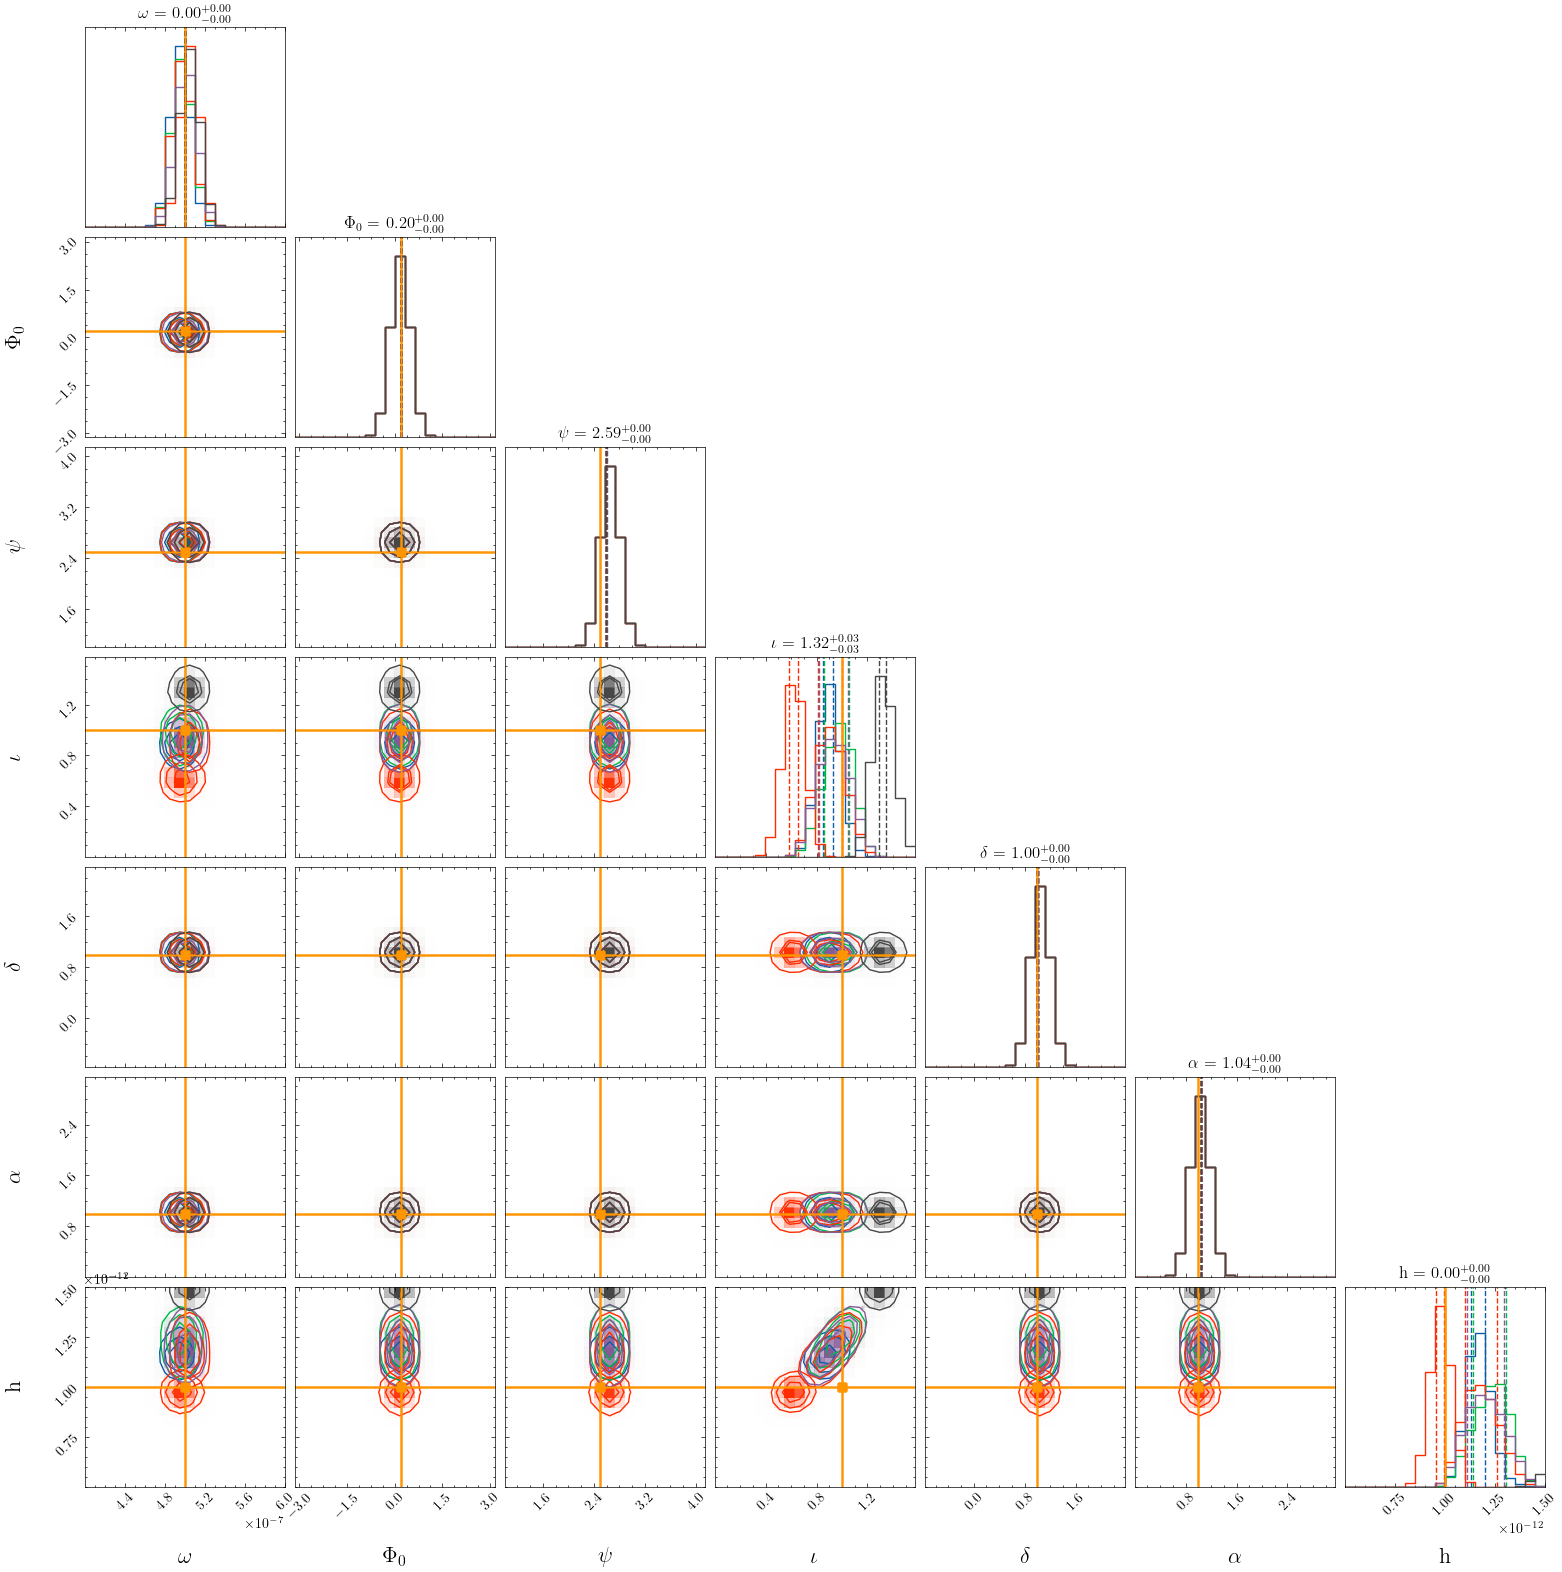

In [81]:


variables_to_plot = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw", "h"]
ranges=[(4e-7,6e-7),(-np.pi,np.pi),(0.0+1.0,np.pi+1.0),(0.0,np.pi/2.0),(-np.pi/2 + 0.8,np.pi/2 + 0.8),(0.0,np.pi),(0.5e-12,1.5e-12)]
injection_parameters = [5e-7,0.20,2.50,1.0,1.0,1.0,1e-12]
labels = [r'$\omega$',r'$\Phi_0$',r'$\psi$',r'$\iota$', r'$\delta$',r'$\alpha$',r'h']
axes_scales = None

stacked_corner(list_of_files,variables_to_plot,ranges,injection_parameters,labels,axes_scales)

Loading data from file: ../data/nested_sampling/batch_1235_result.json
The evidence is: -542578.9941053521
Number of samples: 11960
Truths/Medians/Variances
f00 330.4588790003271 0.10807468969932851
f01 205.76780618659276 0.15125082766022085
f02 303.9400586498163 1.490989017666469
f03 328.91655374231755 0.14653646933687187
f04 348.2939873903182 2.9531304697330145
---------------------------------------------------
Loading data from file: ../data/nested_sampling/batch_1237_result.json
The evidence is: -538677.3000651377
Number of samples: 9836
Truths/Medians/Variances
f00 329.4254443199831 0.22260675980011554
f01 207.02944853402727 0.0984984565426536
f02 302.9423808071124 2.023289508974191
f03 329.2935000209259 0.110795739842539
f04 348.3448760713368 2.452717405984241
---------------------------------------------------
Loading data from file: ../data/nested_sampling/batch_1238_result.json
The evidence is: -541876.2120628876
Number of samples: 7784
Truths/Medians/Variances
f00 330.718030

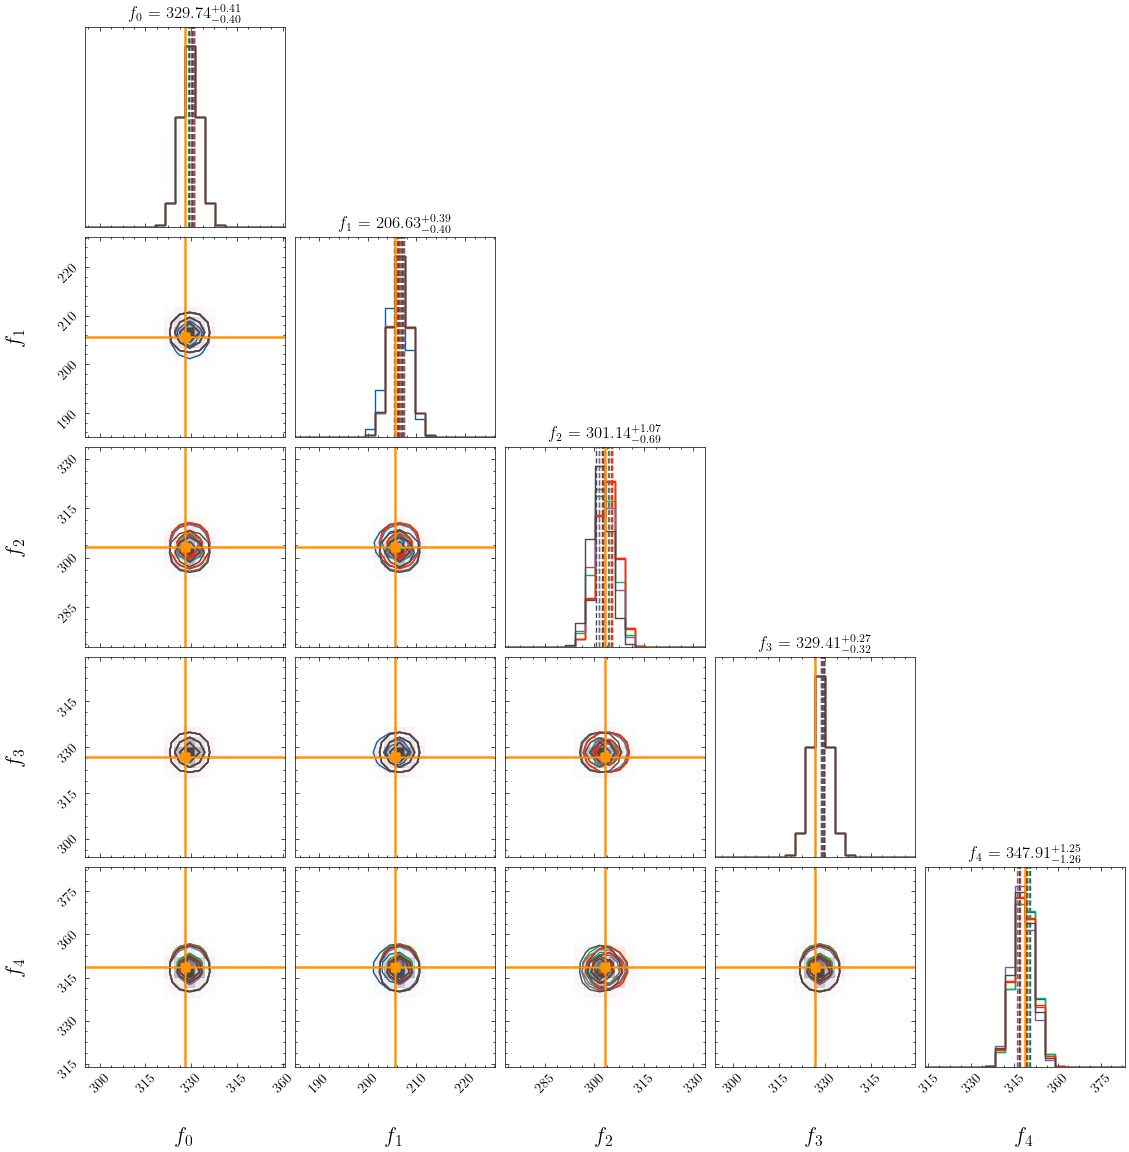

In [71]:
#Plot f0 
pulsars = pd.read_csv("../data/NANOGrav_pulsars.csv")
true_f = pulsars["F0"].to_numpy()


labels = [r'$f_0$',r'$f_1$',r'$f_2$',r'$f_3$', r'$f_4$']
idx = len(labels)
injection_parameters = true_f[0:idx]
variables_to_plot = ["f00", "f01", "f02", "f03", "f04"]

ranges = [(i*0.9,i*1.1) for i in injection_parameters]
axes_scales = None
stacked_corner(list_of_files,variables_to_plot,ranges,injection_parameters,labels,axes_scales)

Loading data from file: ../data/nested_sampling/batch_1235_result.json
The evidence is: -542578.9941053521
Number of samples: 11960
Truths/Medians/Variances
fdot0 -1.2266281422898631e-15 3.339913346624185e-35
fdot1 -4.297700193434213e-16 2.7429724546298224e-36
fdot2 -6.449712210863727e-16 5.99088070872654e-36
fdot3 -1.0219047656085145e-15 1.8232570428737388e-35
fdot4 -4.1773393500631184e-16 2.7602978230113405e-36
---------------------------------------------------
Loading data from file: ../data/nested_sampling/batch_1237_result.json
The evidence is: -538677.3000651377
Number of samples: 9836
Truths/Medians/Variances
fdot0 -1.225212040456997e-15 2.78491075732231e-35
fdot1 -4.30880159712904e-16 2.1040035366880772e-36
fdot2 -6.493305541179381e-16 7.65592811968548e-36
fdot3 -1.0218319925150396e-15 2.0190923465198828e-35
fdot4 -4.188181375987945e-16 3.160973008413512e-36
---------------------------------------------------
Loading data from file: ../data/nested_sampling/batch_1238_result.js

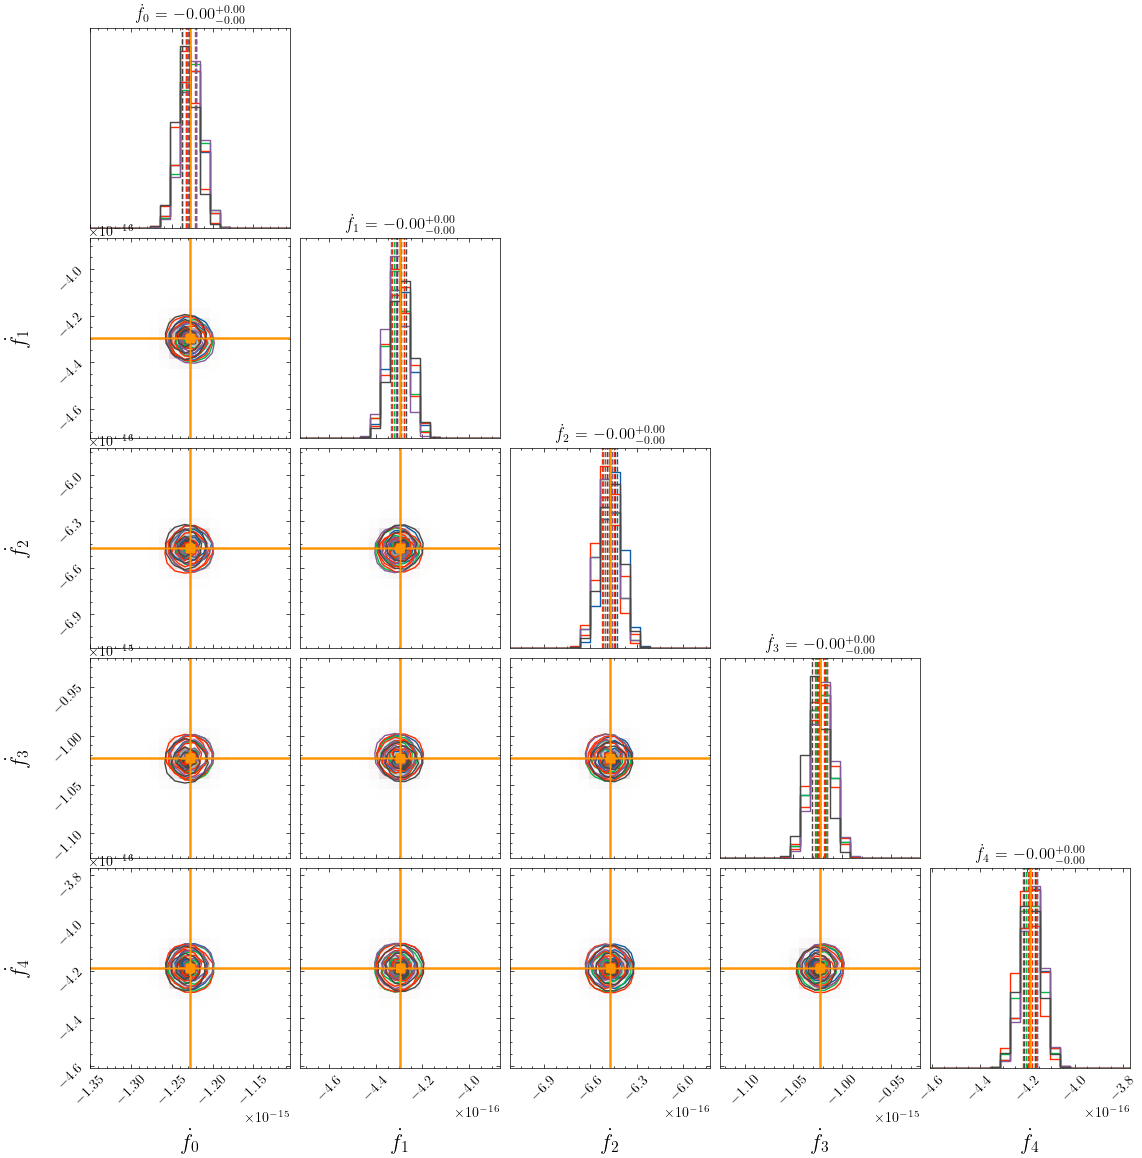

In [73]:
#Plot f1 
pulsars = pd.read_csv("../data/NANOGrav_pulsars.csv")
true_f = pulsars["F1"].to_numpy()


labels = [r'$\dot{f}_0$',r'$\dot{f}_1$',r'$\dot{f}_2$',r'$\dot{f}_3$', r'$\dot{f}_4$']
idx = len(labels)
injection_parameters = true_f[0:idx]
variables_to_plot = ["fdot0", "fdot1", "fdot2", "fdot3", "fdot4"]

tol = 0.1
ranges = [(i-np.abs(i*tol),i+np.abs(i*tol)) for i in injection_parameters]
axes_scales = None
stacked_corner(list_of_files,variables_to_plot,ranges,injection_parameters,labels,axes_scales)

In [ ]:
#Plot f1 
pulsars = pd.read_csv("../data/NANOGrav_pulsars.csv")
true_f = pulsars["F1"].to_numpy()


labels = [r'$\dot{f}_0$',r'$\dot{f}_1$',r'$\dot{f}_2$',r'$\dot{f}_3$', r'$\dot{f}_4$']
idx = len(labels)
injection_parameters = true_f[0:idx]
variables_to_plot = ["fdot0", "fdot1", "fdot2", "fdot3", "fdot4"]

tol = 0.1
ranges = [(i-np.abs(i*tol),i+np.abs(i*tol)) for i in injection_parameters]
axes_scales = None
stacked_corner(list_of_files,variables_to_plot,ranges,injection_parameters,labels,axes_scales)

### $\sigma_p$ with broader priors

The evidence is: -538349.0957030396
Number of samples:
11212
Truths/Medians/Variances
5e-07 omega_gw 4.999605842291663e-07 2.3333705111086016e-23
0.2 phi0_gw 0.18580224492781688 7.196736587336943e-07
2.5 psi_gw 2.594570465369917 3.0431154011372797e-07
1.0 iota_gw 0.9266642726619778 0.009345169800030152
1.0 delta_gw 1.000144983935866 2.0256206174000043e-07
1.0 alpha_gw 1.0392788179424048 1.3954880082592517e-07
1e-12 h 1.196161832383244e-12 6.676789356518044e-27
selected variabels are
['omega_gw', 'phi0_gw', 'psi_gw', 'iota_gw', 'delta_gw', 'alpha_gw', 'h']


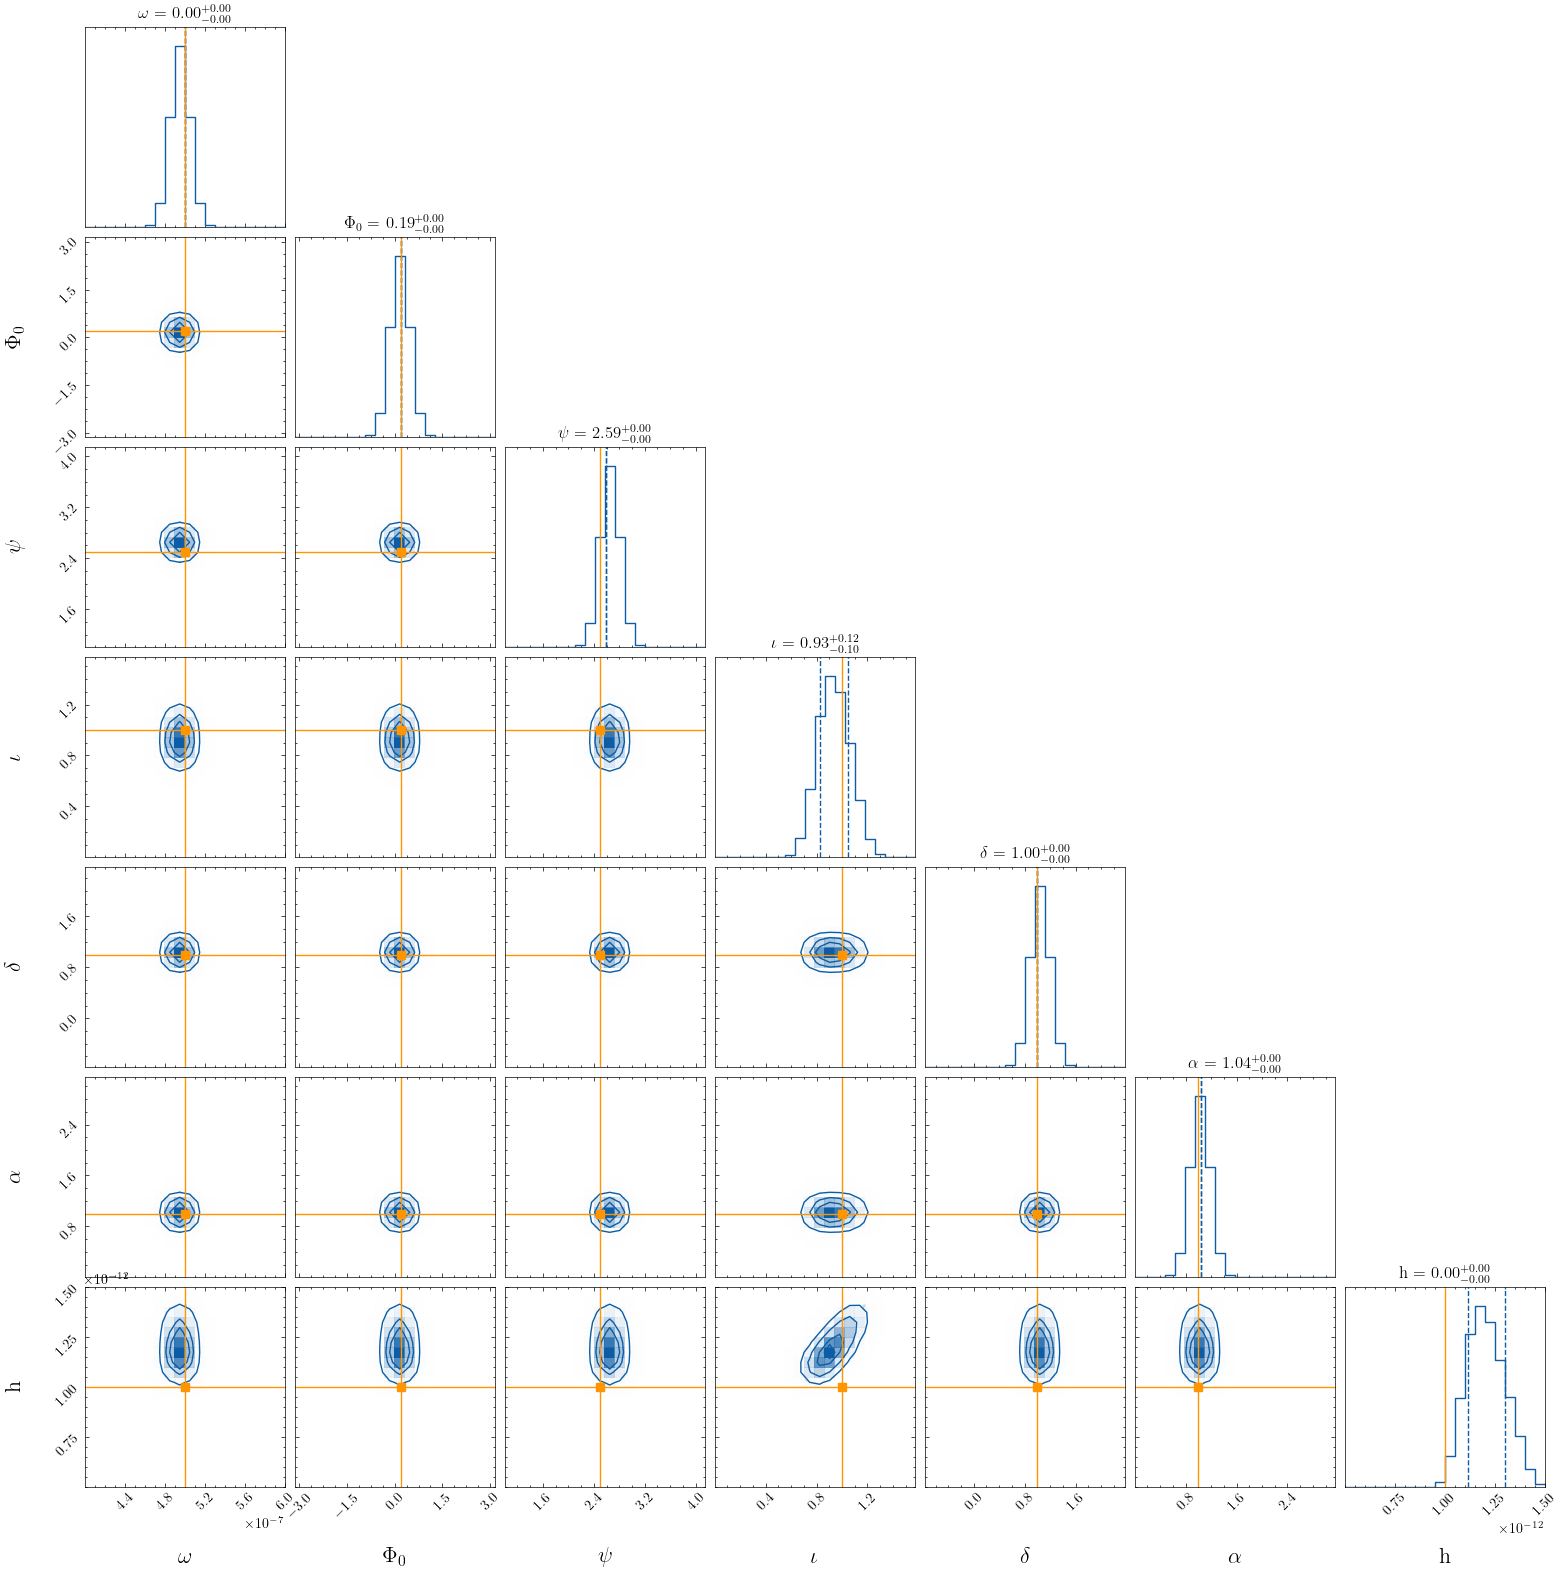

The evidence is: -538349.0957030396
Number of samples:
11212
Truths/Medians/Variances
327.8470205611185 f00 330.33722873275246 0.1411693429331336
205.53069910059 f01 206.70947282695107 0.1347787648965818
303.0909794113198 f02 304.3196318661088 1.0027900253309947
326.600561967271 f03 329.12809591374287 0.12883934647261447
348.5592316999902 f04 346.6846995580416 1.137566793350238
selected variabels are
['f00', 'f01', 'f02', 'f03', 'f04']


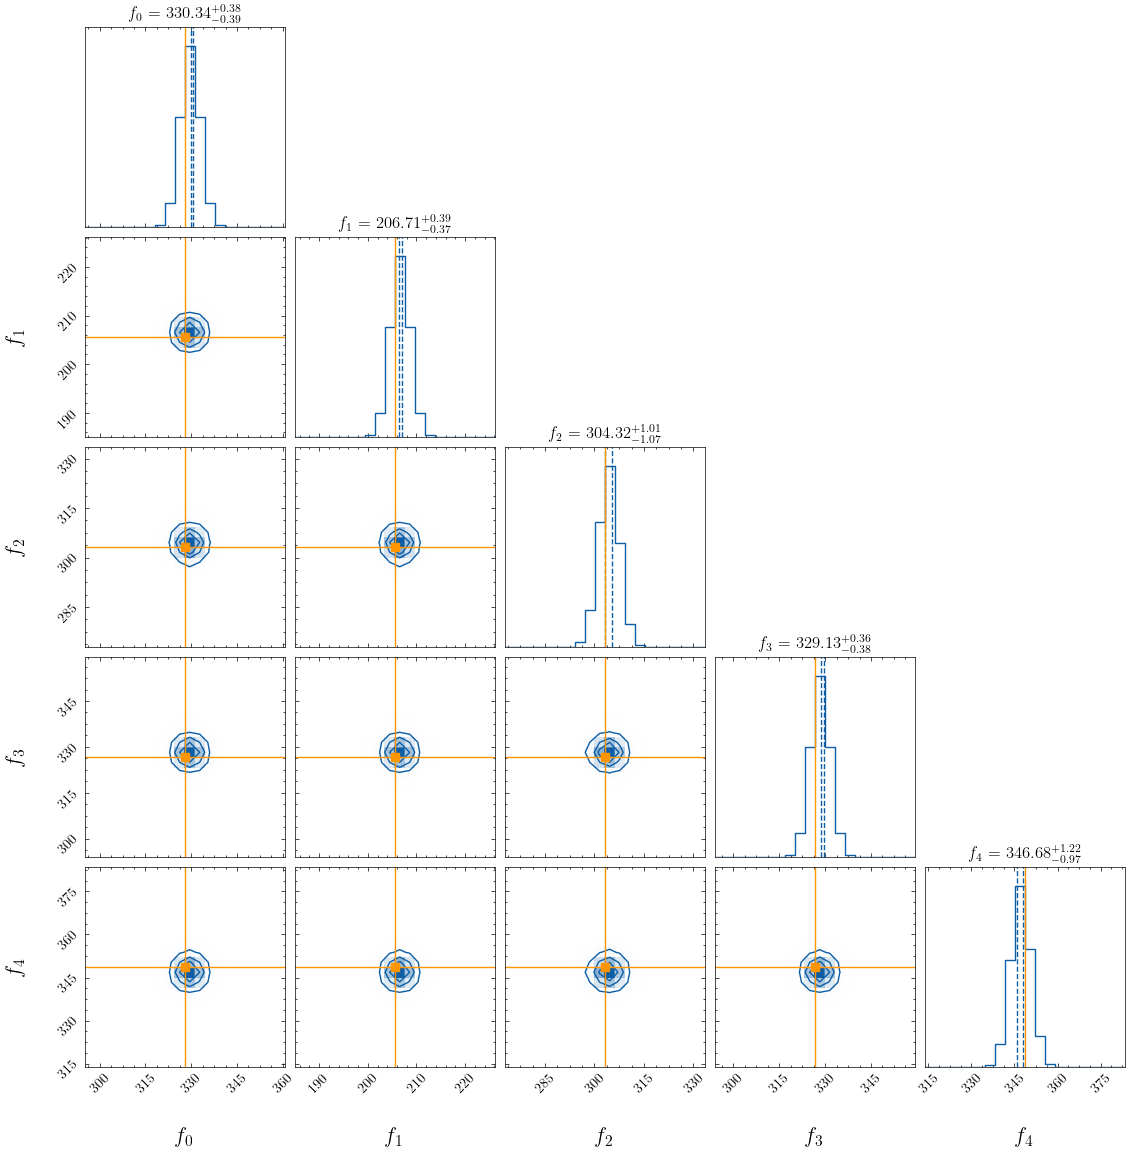

The evidence is: -538349.0957030396
Number of samples:
11212
Truths/Medians/Variances
-1.227834e-15 fdot0 -1.2264158859567795e-15 2.5146337620900823e-35
-4.297e-16 fdot1 -4.3277973339911867e-16 6.83738586161998e-37
-6.4737e-16 fdot2 -6.470252632860629e-16 7.854804151563487e-36
-1.022991e-15 fdot3 -1.0222060180302743e-15 2.1033644938070404e-35
-4.1895e-16 fdot4 -4.188151801721933e-16 3.5970044190382894e-36
selected variabels are
['fdot0', 'fdot1', 'fdot2', 'fdot3', 'fdot4']


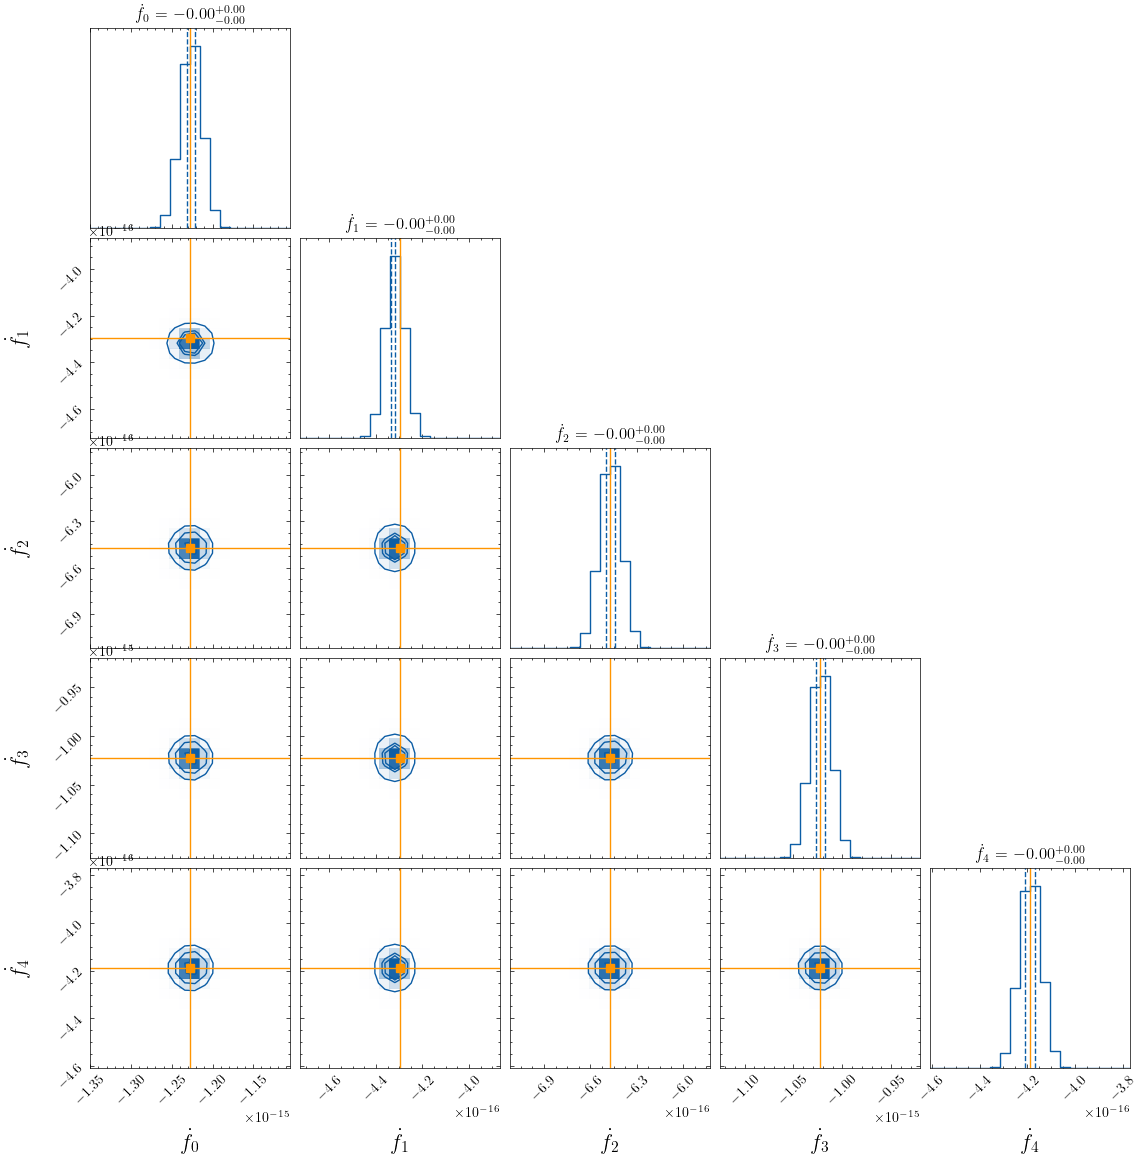

The evidence is: -538349.0957030396
Number of samples:
11212
Truths/Medians/Variances
5.054028399366765e-20 sigma_p0 1.1090817096757153e-20 3.945283143012294e-40
6.644933202006474e-20 sigma_p1 5.5781894309645055e-21 1.003358105121594e-40
2.4231055016152945e-20 sigma_p2 7.736570722952726e-21 1.7762966659534013e-40
5.255055881680675e-21 sigma_p3 1.6589834227098956e-20 5.1207375062842445e-40
4.059888409075103e-20 sigma_p4 9.562232379048497e-21 1.859897734373101e-40
selected variabels are
['sigma_p0', 'sigma_p1', 'sigma_p2', 'sigma_p3', 'sigma_p4']


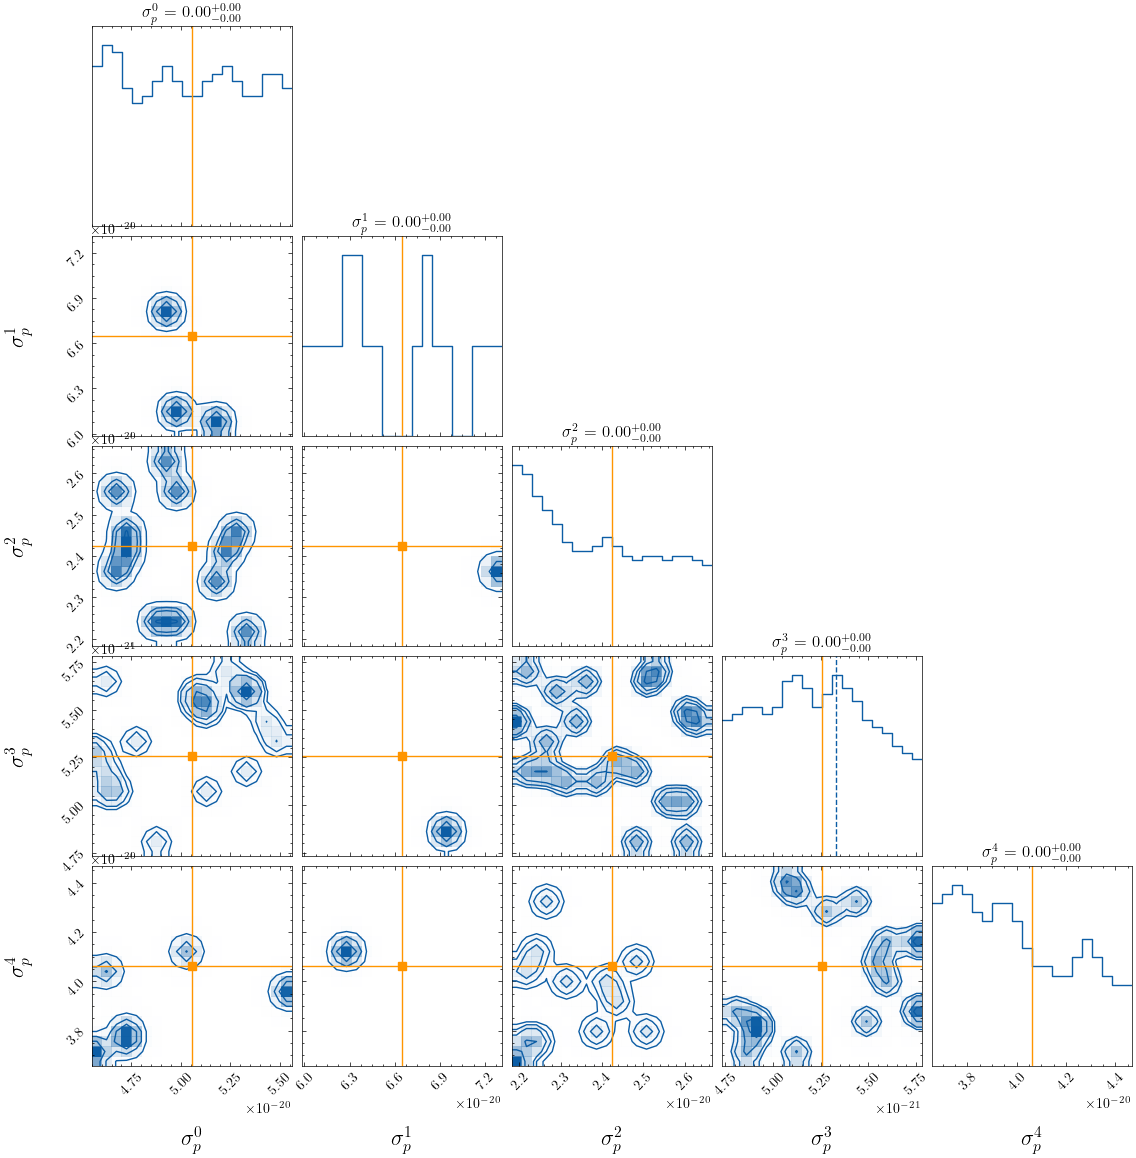

In [82]:




import numpy as np 
path = "../data/nested_sampling/sigma_priors_corrected_result.json"
plot_all_corners(path,1237)





The evidence is: -538349.0957030396


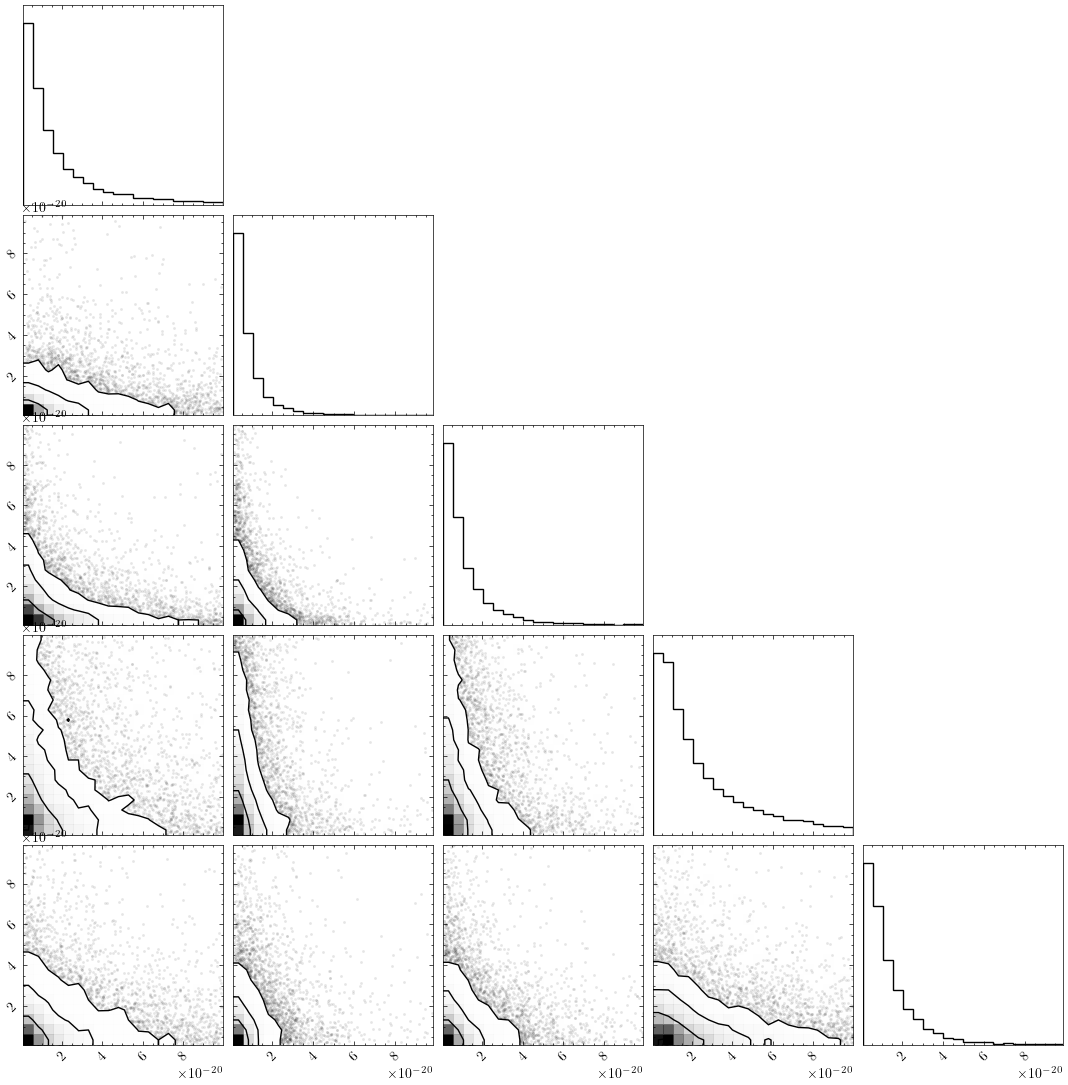

In [100]:


import corner 


seed = 1237

generator = np.random.default_rng(seed)
σp = generator.uniform(low = 1e-21,high=1e-19,size=len(true_f))

        
labels = [r'$\sigma_p^0$',r'$\sigma_p^1$',r'$\sigma_p^2$',r'$\sigma_p^3$', r'$\sigma_p^4$']
idx = len(labels)
injection_parameters = σp[0:idx]

variables_to_plot    = ["sigma_p0", "sigma_p1", "sigma_p2", "sigma_p3", "sigma_p4"]

path = "../data/nested_sampling/sigma_priors_corrected_result.json"

        
        
    # Opening JSON file
f = open(path)

# returns JSON object as 
# a dictionary
data = json.load(f)


print("The evidence is:", data["log_evidence"])

#Make it a dataframe. Nice for surfacing
df = pd.DataFrame(data["samples"]["content"]) # posterior


#Make it a dataframe. Nice for surfacing
df_posterior = pd.DataFrame(data["posterior"]["content"]) # posterior
  
y_post = df_posterior[variables_to_plot].to_numpy()
ranges= [(1.0,2.0) for i in injection_parameters] 
           
axes_scales = ["log","log","log","log","log"]

ranges = [1.0 for i in injection_parameters]
fig = corner.corner(y_post,axes_scale = "log",range=ranges)#,range=ranges,blob_argument="stiff")


# fig = corner.corner(y_post, 
#                     color='C0',
#                     show_titles=True,
#                     smooth=True,smooth1d=True,
#                     axes_scales = 'log',
#                     truth_color='C2',
#                     quantiles=[0.16, 0.84],
#                     truths = injection_parameters,
#                     range=ranges,
#                     labels = labels,
#                     label_kwargs=dict(fontsize=16),
#                     )


  #  tol = 0.1
  #  ranges = [(i-np.abs(i*tol),i+np.abs(i*tol)) for i in injection_parameters]
  #  axes_scales = None
#plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=None)

The evidence is: -538349.0957030396


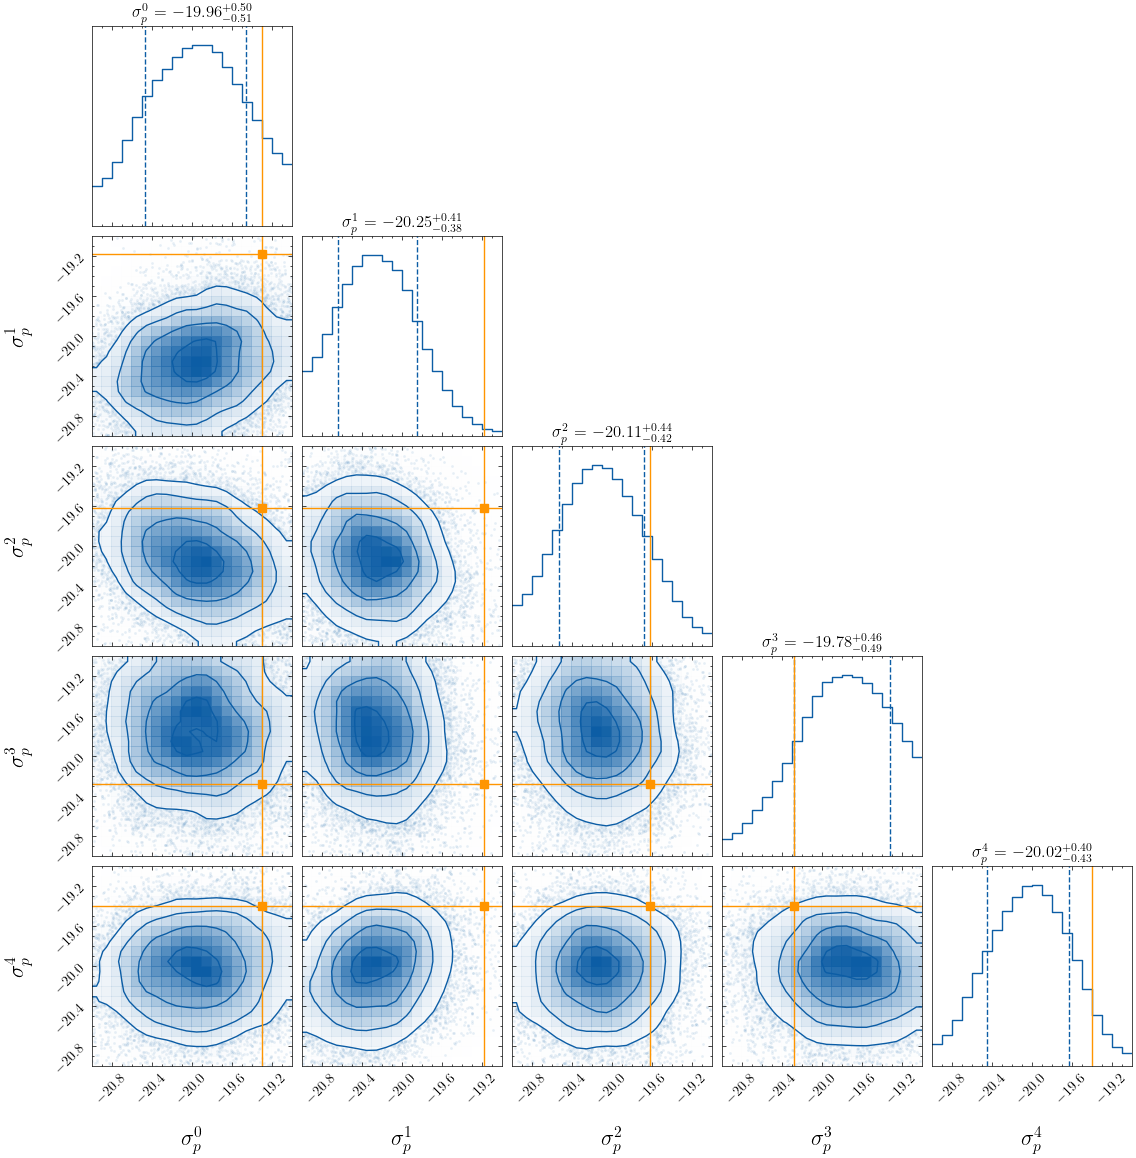

In [105]:


import corner 


seed = 1237

generator = np.random.default_rng(seed)
σp = generator.uniform(low = 1e-21,high=1e-19,size=len(true_f))

        
labels = [r'$\sigma_p^0$',r'$\sigma_p^1$',r'$\sigma_p^2$',r'$\sigma_p^3$', r'$\sigma_p^4$']
idx = len(labels)
injection_parameters = σp[0:idx]

variables_to_plot    = ["sigma_p0", "sigma_p1", "sigma_p2", "sigma_p3", "sigma_p4"]

path = "../data/nested_sampling/sigma_priors_corrected_result.json"

        
        
    # Opening JSON file
f = open(path)

# returns JSON object as 
# a dictionary
data = json.load(f)


print("The evidence is:", data["log_evidence"])

#Make it a dataframe. Nice for surfacing
df = pd.DataFrame(data["samples"]["content"]) # posterior


#Make it a dataframe. Nice for surfacing
df_posterior = pd.DataFrame(data["posterior"]["content"]) # posterior
  
y_post = np.log10(df_posterior[variables_to_plot].to_numpy())
#ranges= [(1.0,2.0) for i in injection_parameters] 
           
axes_scales = ["log","log","log","log","log"]

ranges = [(np.log10(1e-21),np.log10(1e-19)) for i in injection_parameters]
fig = corner.corner(y_post,range=ranges,
                    color='C0',
                    show_titles=True,
                    smooth=True,smooth1d=True,
                    truth_color='C2',
                    quantiles=[0.16,0.84],
                    truths=np.log10(injection_parameters),
                    labels=labels,
                    label_kwargs=dict(fontsize=16))#,range=ranges,blob_argument="stiff")


# fig = corner.corner(y_post, 
#                     color='C0',
#                     show_titles=True,
#                     smooth=True,smooth1d=True,
#                     axes_scales = 'log',
#                     truth_color='C2',
#                     quantiles=[0.16, 0.84],
#                     truths = injection_parameters,
#                     range=ranges,
#                     labels = labels,
#                     label_kwargs=dict(fontsize=16),
#                     )


  #  tol = 0.1
  #  ranges = [(i-np.abs(i*tol),i+np.abs(i*tol)) for i in injection_parameters]
  #  axes_scales = None
#plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=None)